# DLV Group Project

In [135]:
 # General imports
import tensorflow as tf
tf.compat.v1.enable_eager_execution(
    config=None, device_policy=None, execution_mode=None
)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os, datetime
# Shortcuts to keras if (however from tensorflow)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import TensorBoard 

# Shortcut for displaying images
def plot_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()

# Load Images

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#@title
!unzip "/content/drive/MyDrive/2020-02-14_InfraredSolarModules.zip"

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
  inflating: InfraredSolarModules/images/2121.jpg  
  inflating: InfraredSolarModules/images/11778.jpg  
  inflating: InfraredSolarModules/images/5896.jpg  
  inflating: InfraredSolarModules/images/4550.jpg  
  inflating: InfraredSolarModules/images/19324.jpg  
  inflating: InfraredSolarModules/images/16017.jpg  
  inflating: InfraredSolarModules/images/10472.jpg  
  inflating: InfraredSolarModules/images/2135.jpg  
  inflating: InfraredSolarModules/images/4.jpg  
  inflating: InfraredSolarModules/images/5882.jpg  
  inflating: InfraredSolarModules/images/19330.jpg  
  inflating: InfraredSolarModules/images/4544.jpg  
  inflating: InfraredSolarModules/images/16003.jpg  
  inflating: InfraredSolarModules/images/12265.jpg  
  inflating: InfraredSolarModules/images/9060.jpg  
  inflating: InfraredSolarModules/images/14614.jpg  
  inflating: InfraredSolarModules/images/6353.jpg  
  inflating: InfraredSolarModules/images/970

In [29]:
df = pd.read_json("/content/InfraredSolarModules/module_metadata.json",orient="index")
df

,image_filepath,anomaly_class
13357,images/13357.jpg,No-Anomaly
13356,images/13356.jpg,No-Anomaly
19719,images/19719.jpg,No-Anomaly
11542,images/11542.jpg,No-Anomaly
11543,images/11543.jpg,No-Anomaly
...,...,...
8488,images/8488.jpg,Vegetation
8489,images/8489.jpg,Vegetation
7464,images/7464.jpg,Cracking
18065,images/18065.jpg,No-Anomaly


In [30]:
df['image_name'] = df['image_filepath'].str[7:]
df

,image_filepath,anomaly_class,image_name
13357,images/13357.jpg,No-Anomaly,13357.jpg
13356,images/13356.jpg,No-Anomaly,13356.jpg
19719,images/19719.jpg,No-Anomaly,19719.jpg
11542,images/11542.jpg,No-Anomaly,11542.jpg
11543,images/11543.jpg,No-Anomaly,11543.jpg
...,...,...,...
8488,images/8488.jpg,Vegetation,8488.jpg
8489,images/8489.jpg,Vegetation,8489.jpg
7464,images/7464.jpg,Cracking,7464.jpg
18065,images/18065.jpg,No-Anomaly,18065.jpg


# Explore Images

In [31]:
classes = df["anomaly_class"].unique()
classes

array(['No-Anomaly', 'Cell', 'Hot-Spot', 'Offline-Module', 'Vegetation',
       'Diode', 'Shadowing', 'Cracking', 'Diode-Multi', 'Hot-Spot-Multi',
       'Cell-Multi', 'Soiling'], dtype=object)

In [11]:
df.groupby('anomaly_class').head(1)

,image_filepath,anomaly_class,image_name
13357,images/13357.jpg,No-Anomaly,13357.jpg
5988,images/5988.jpg,Cell,5988.jpg
6796,images/6796.jpg,Hot-Spot,6796.jpg
270,images/270.jpg,Offline-Module,270.jpg
9528,images/9528.jpg,Vegetation,9528.jpg
2143,images/2143.jpg,Diode,2143.jpg
3519,images/3519.jpg,Shadowing,3519.jpg
7188,images/7188.jpg,Cracking,7188.jpg
876,images/876.jpg,Diode-Multi,876.jpg
8019,images/8019.jpg,Hot-Spot-Multi,8019.jpg


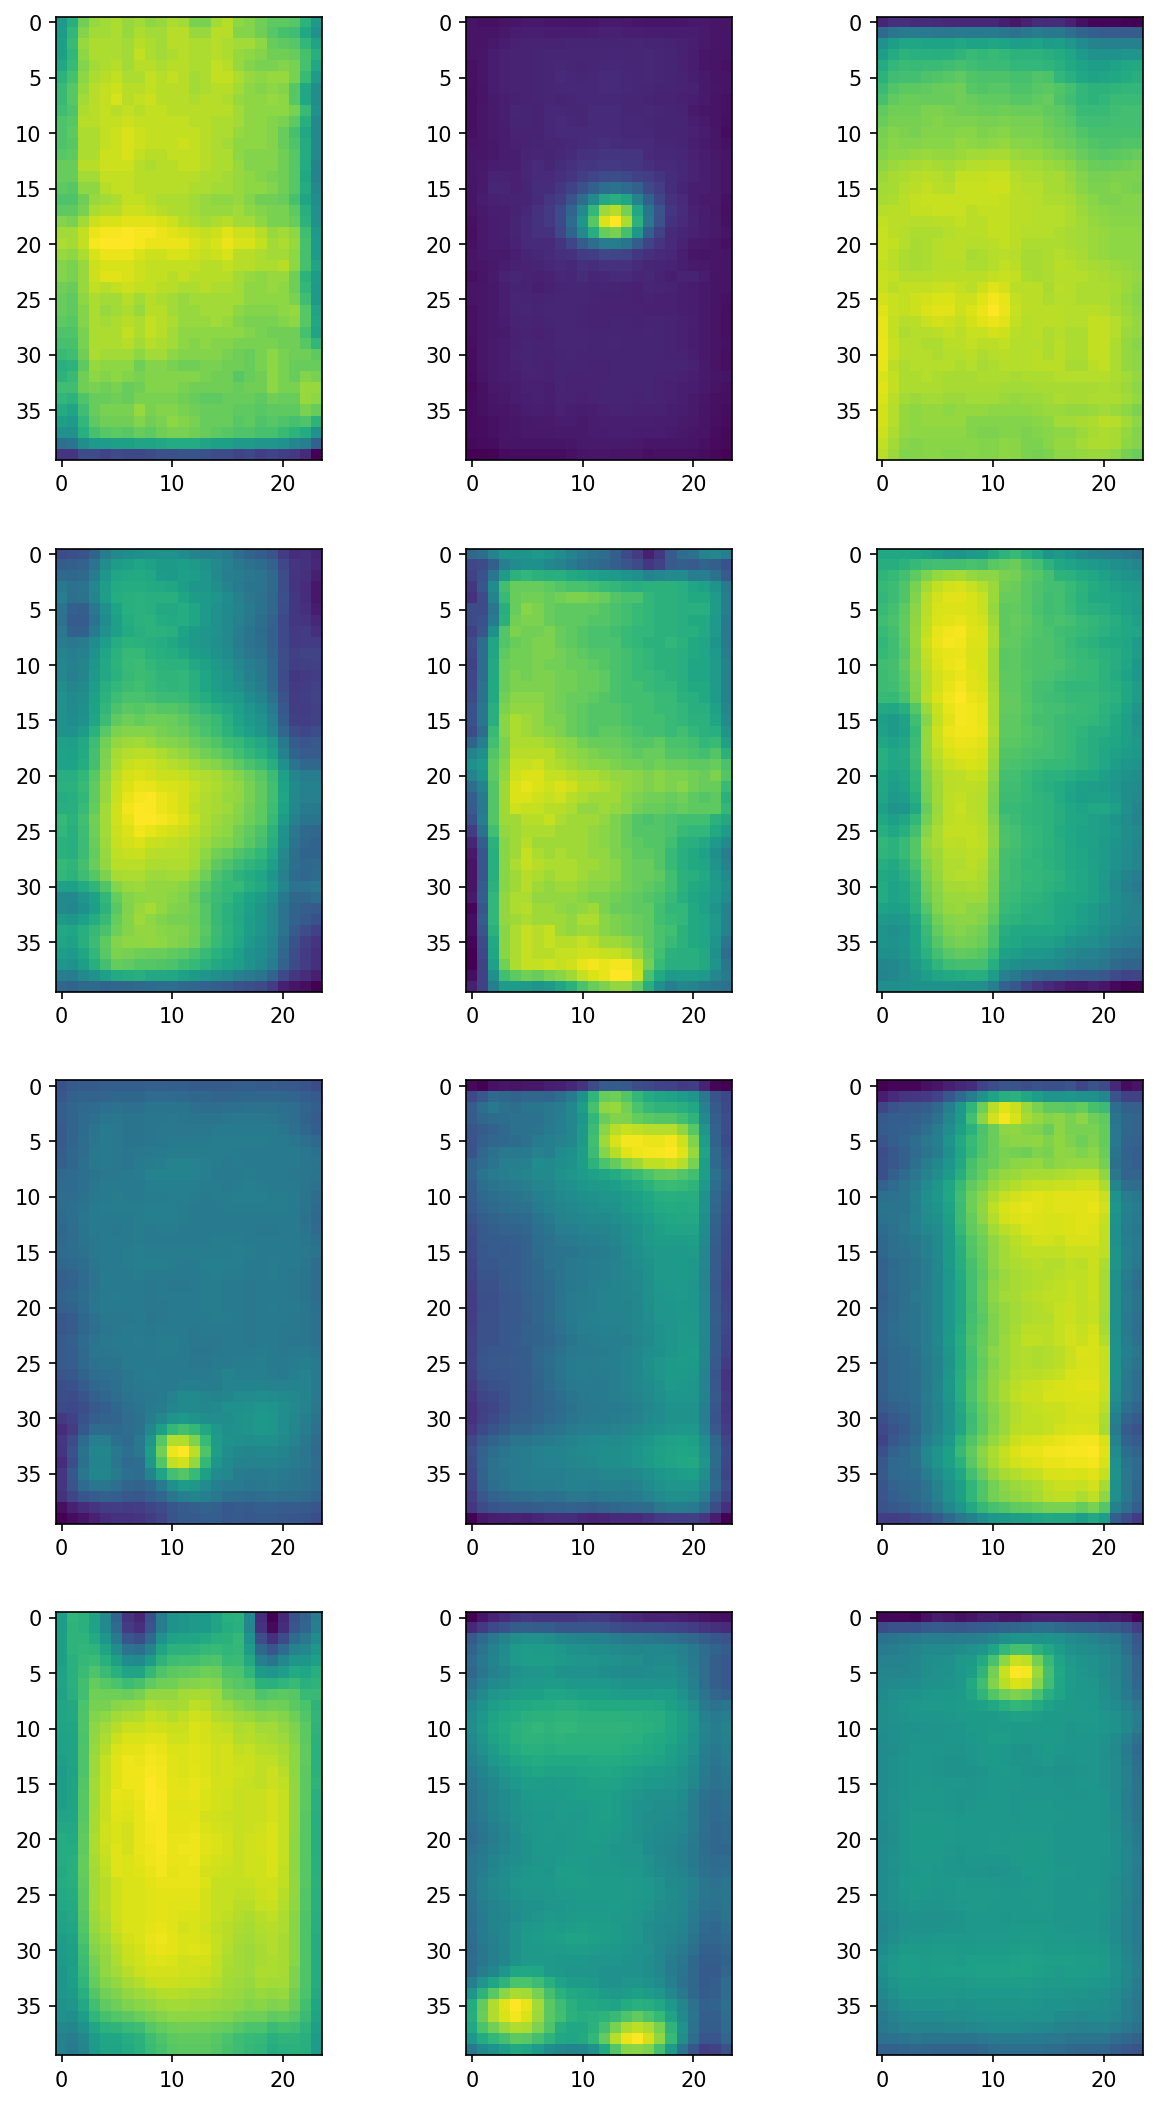

In [38]:
img1 = mpimg.imread('/content/InfraredSolarModules/images/13357.jpg') #No-Anomaly
img2 = mpimg.imread('/content/InfraredSolarModules/images/5988.jpg')  #Cell
img3 = mpimg.imread('/content/InfraredSolarModules/images/6796.jpg')  #Hot-Spot
img4 = mpimg.imread('/content/InfraredSolarModules/images/270.jpg')  #Offline-Module
img5 = mpimg.imread('/content/InfraredSolarModules/images/9528.jpg') #Vegetation
img6 = mpimg.imread('/content/InfraredSolarModules/images/2143.jpg')  #Diode
img7 = mpimg.imread('/content/InfraredSolarModules/images/3519.jpg')  #Shadowing
img8 = mpimg.imread('/content/InfraredSolarModules/images/7188.jpg')  #Cracking
img9 = mpimg.imread('/content/InfraredSolarModules/images/876.jpg') #Diode-Multi
img10 = mpimg.imread('/content/InfraredSolarModules/images/8019.jpg')  #Hot-Spot-Multi
img11 = mpimg.imread('/content/InfraredSolarModules/images/4592.jpg')  #Cell-Multi	
img12 = mpimg.imread('/content/InfraredSolarModules/images/8291.jpg')  #Soiling

fig, axarr = plt.subplots(4,3,figsize=(10,18),dpi=150)
axarr[0,0].imshow(img1)
axarr[0,1].imshow(img2)
axarr[0,2].imshow(img3)
axarr[1,0].imshow(img4)
axarr[1,1].imshow(img5)
axarr[1,2].imshow(img6)
axarr[2,0].imshow(img7)
axarr[2,1].imshow(img8)
axarr[2,2].imshow(img9)
axarr[3,0].imshow(img10)
axarr[3,1].imshow(img11)
axarr[3,2].imshow(img12)


# Create training, validation and test set

In [20]:
reduced_df=df.sample(frac=1,random_state=200) # random state is a seed value
train_df=reduced_df.sample(frac=0.8,random_state=200) # random state is a seed value
validation_test_df=reduced_df.drop(train_df.index)
validation_df=validation_test_df.sample(frac=0.5,random_state=200)
test_df=validation_test_df.drop(validation_df.index)
print(train_df.info())
print(validation_df.info())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 10209 to 2938
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  16000 non-null  object
 1   anomaly_class   16000 non-null  object
 2   image_name      16000 non-null  object
dtypes: object(3)
memory usage: 500.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 14835 to 11344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  2000 non-null   object
 1   anomaly_class   2000 non-null   object
 2   image_name      2000 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2358 to 8045
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  2000 non-null   object
 1  

# Build CNN from Scratch

## Create train and validation generator

In [25]:
image_height = 40
image_width = 24
batch_size = 32

datagen_train=ImageDataGenerator(rescale=1./255)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
    color_mode = "grayscale"
)

validation_generator = datagen_validation.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

test_generator = datagen_validation.flow_from_dataframe(
    dataframe = test_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

Found 16000 validated image filenames belonging to 12 classes.
Found 2000 validated image filenames belonging to 12 classes.
Found 2000 validated image filenames belonging to 12 classes.


## Create first model

In [32]:
image_height = 40
image_width = 24
num_classes = 12

model_0 = Sequential()
model_0.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size= (2,2)))

model_0.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size = (2,2)))

model_0.add(Conv2D(filters = 128, kernel_size=(3,3)))
model_0.add(Activation('relu'))
model_0.add(MaxPooling2D(pool_size = (2,2)))

model_0.add(Flatten()) 
model_0.add(Dense(num_classes))
model_0.add(Activation('softmax'))

model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 22, 32)        320       
                                                                 
 activation (Activation)     (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 11, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 9, 64)         18496     
                                                                 
 activation_1 (Activation)   (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 4, 64)         0         
 2D)                                                    

In [33]:
history_0 = model_0.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )
model_0.save("/content/drive/MyDrive/model_0")

Epoch 1/100
500/500 [==============================] - 7s 11ms/step - loss: 1.7916 - accuracy: 0.5012 - val_loss: 1.7734 - val_accuracy: 0.4865
Epoch 2/100
500/500 [==============================] - 5s 11ms/step - loss: 1.7300 - accuracy: 0.5021 - val_loss: 1.7641 - val_accuracy: 0.4860
Epoch 3/100
500/500 [==============================] - 5s 10ms/step - loss: 1.6400 - accuracy: 0.5156 - val_loss: 1.6630 - val_accuracy: 0.5070
Epoch 4/100
500/500 [==============================] - 5s 10ms/step - loss: 1.4817 - accuracy: 0.5583 - val_loss: 1.3764 - val_accuracy: 0.5795
Epoch 5/100
500/500 [==============================] - 5s 10ms/step - loss: 1.3160 - accuracy: 0.6084 - val_loss: 1.2650 - val_accuracy: 0.6145
Epoch 6/100
500/500 [==============================] - 6s 12ms/step - loss: 1.2301 - accuracy: 0.6313 - val_loss: 1.2811 - val_accuracy: 0.6145
Epoch 7/100
500/500 [==============================] - 5s 10ms/step - loss: 1.1784 - accuracy: 0.6429 - val_loss: 1.1993 - val_accuracy:

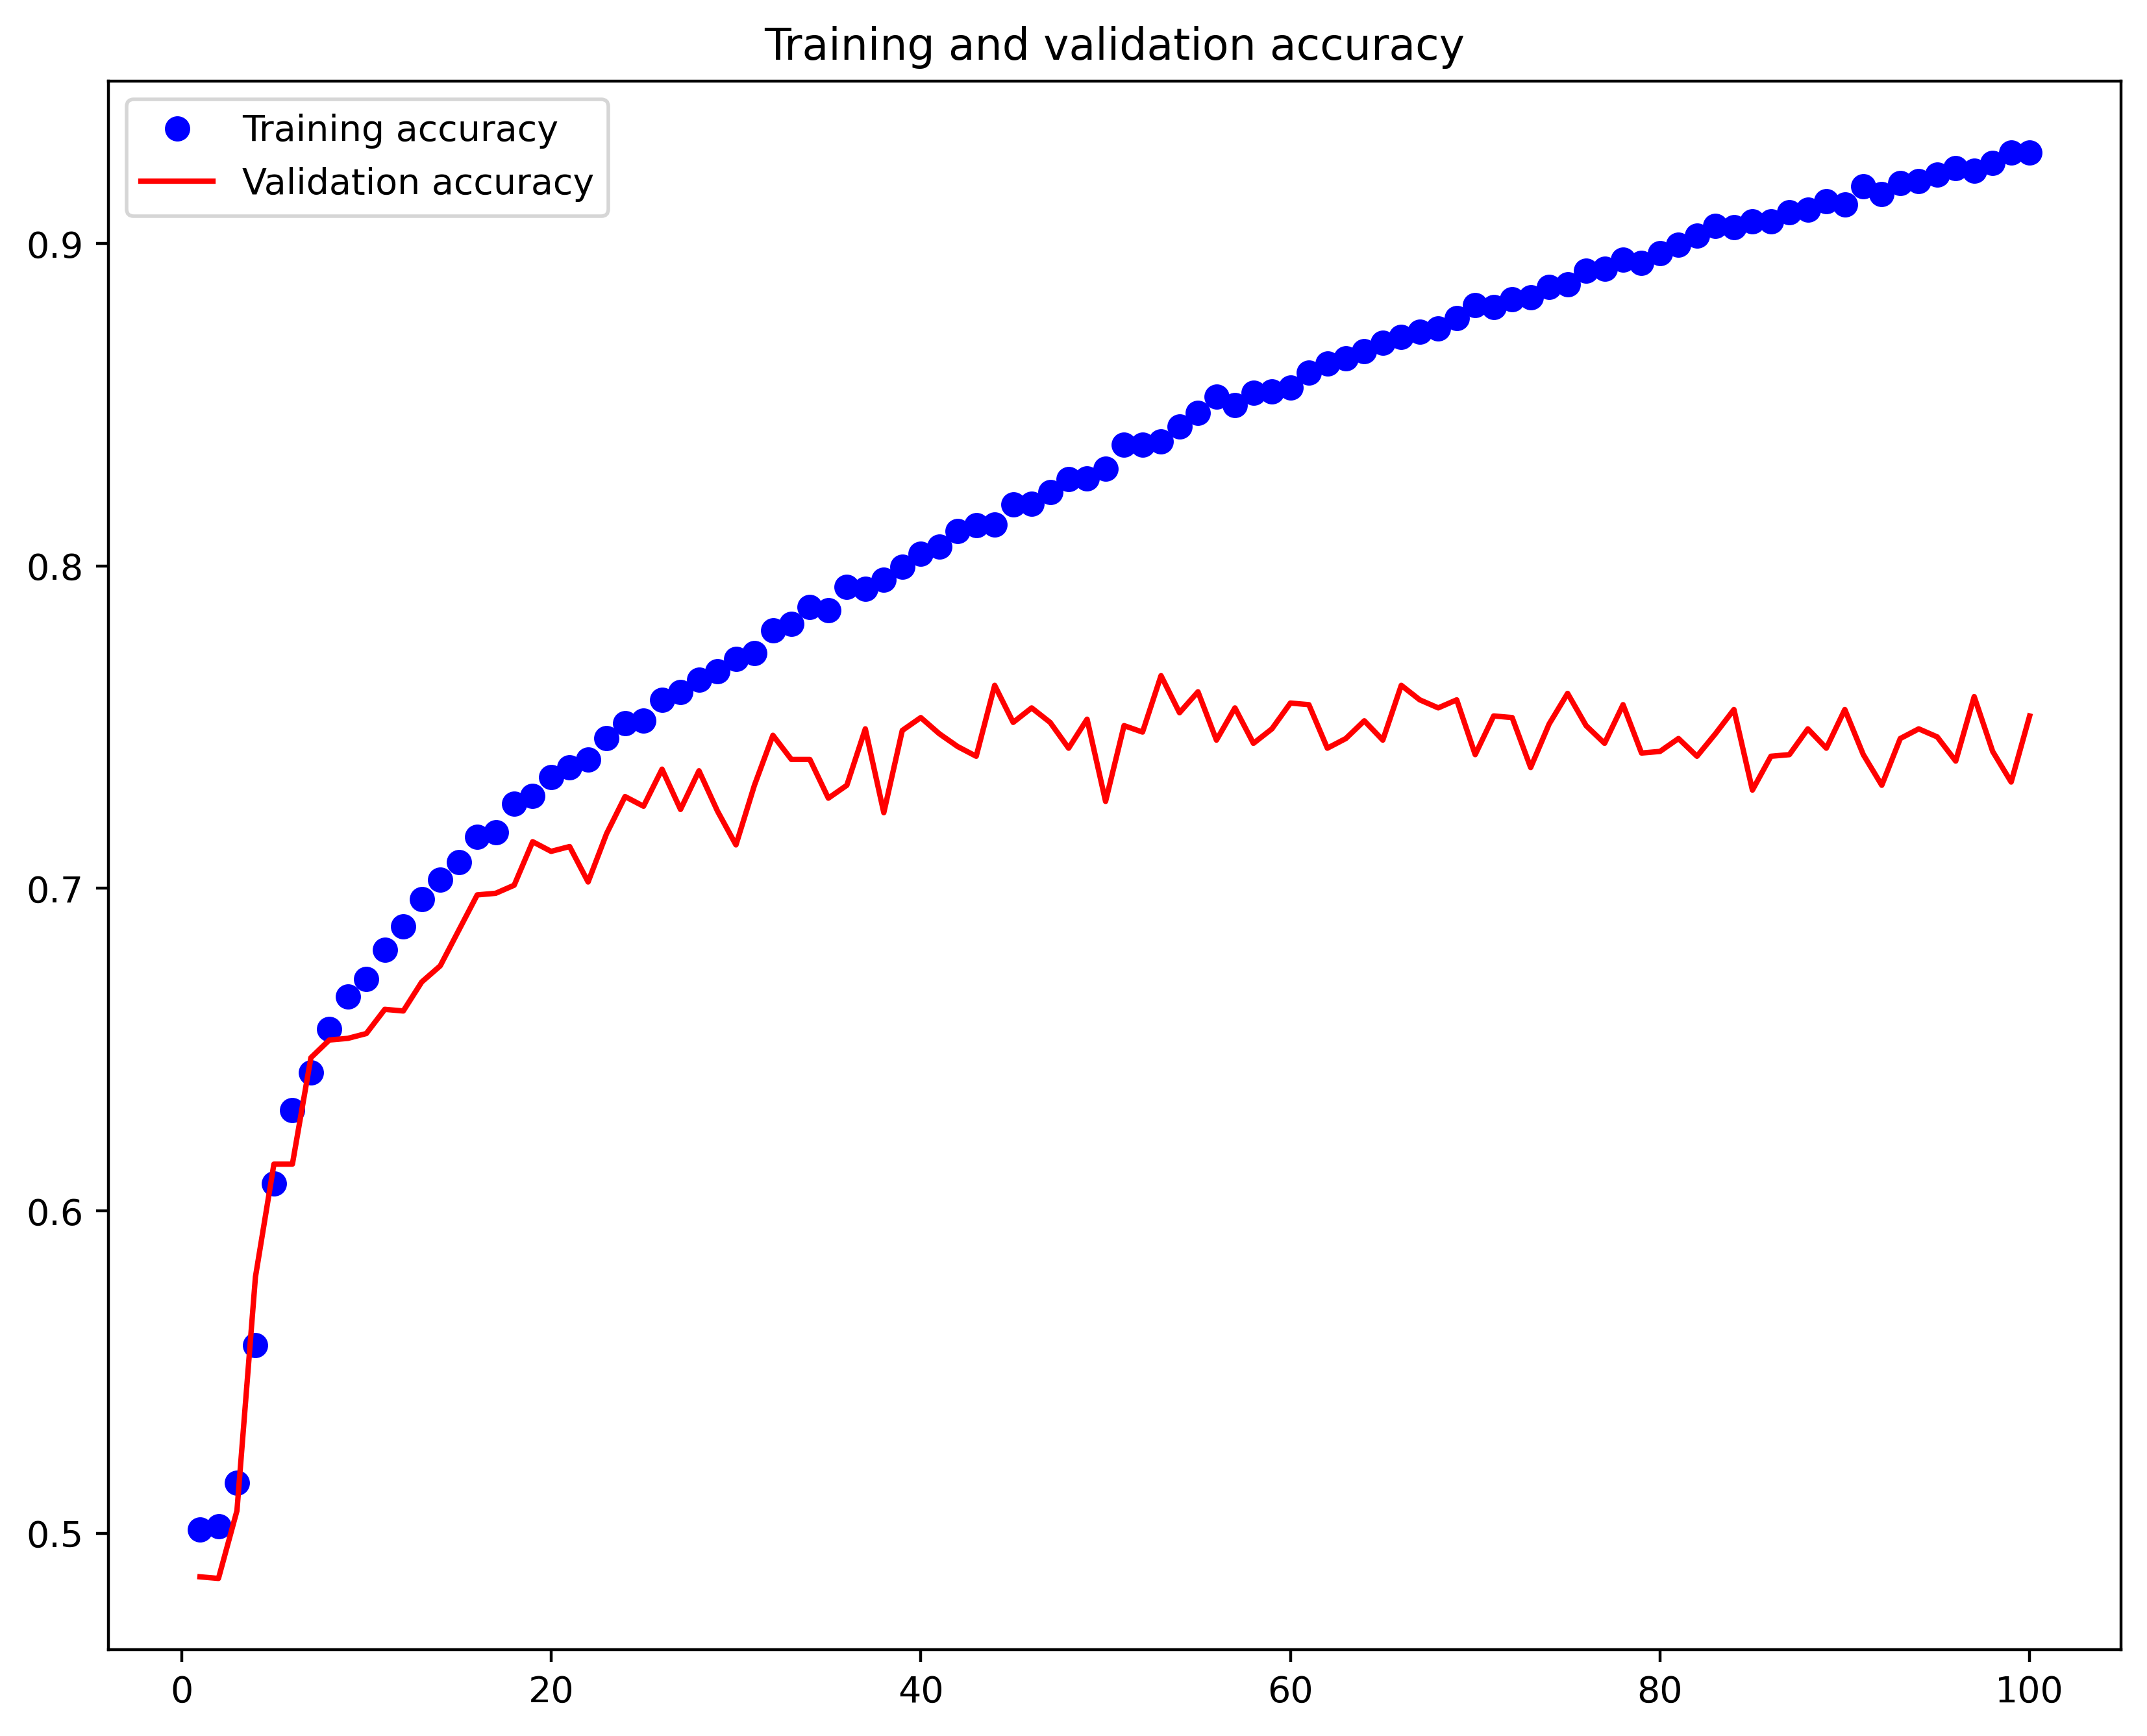

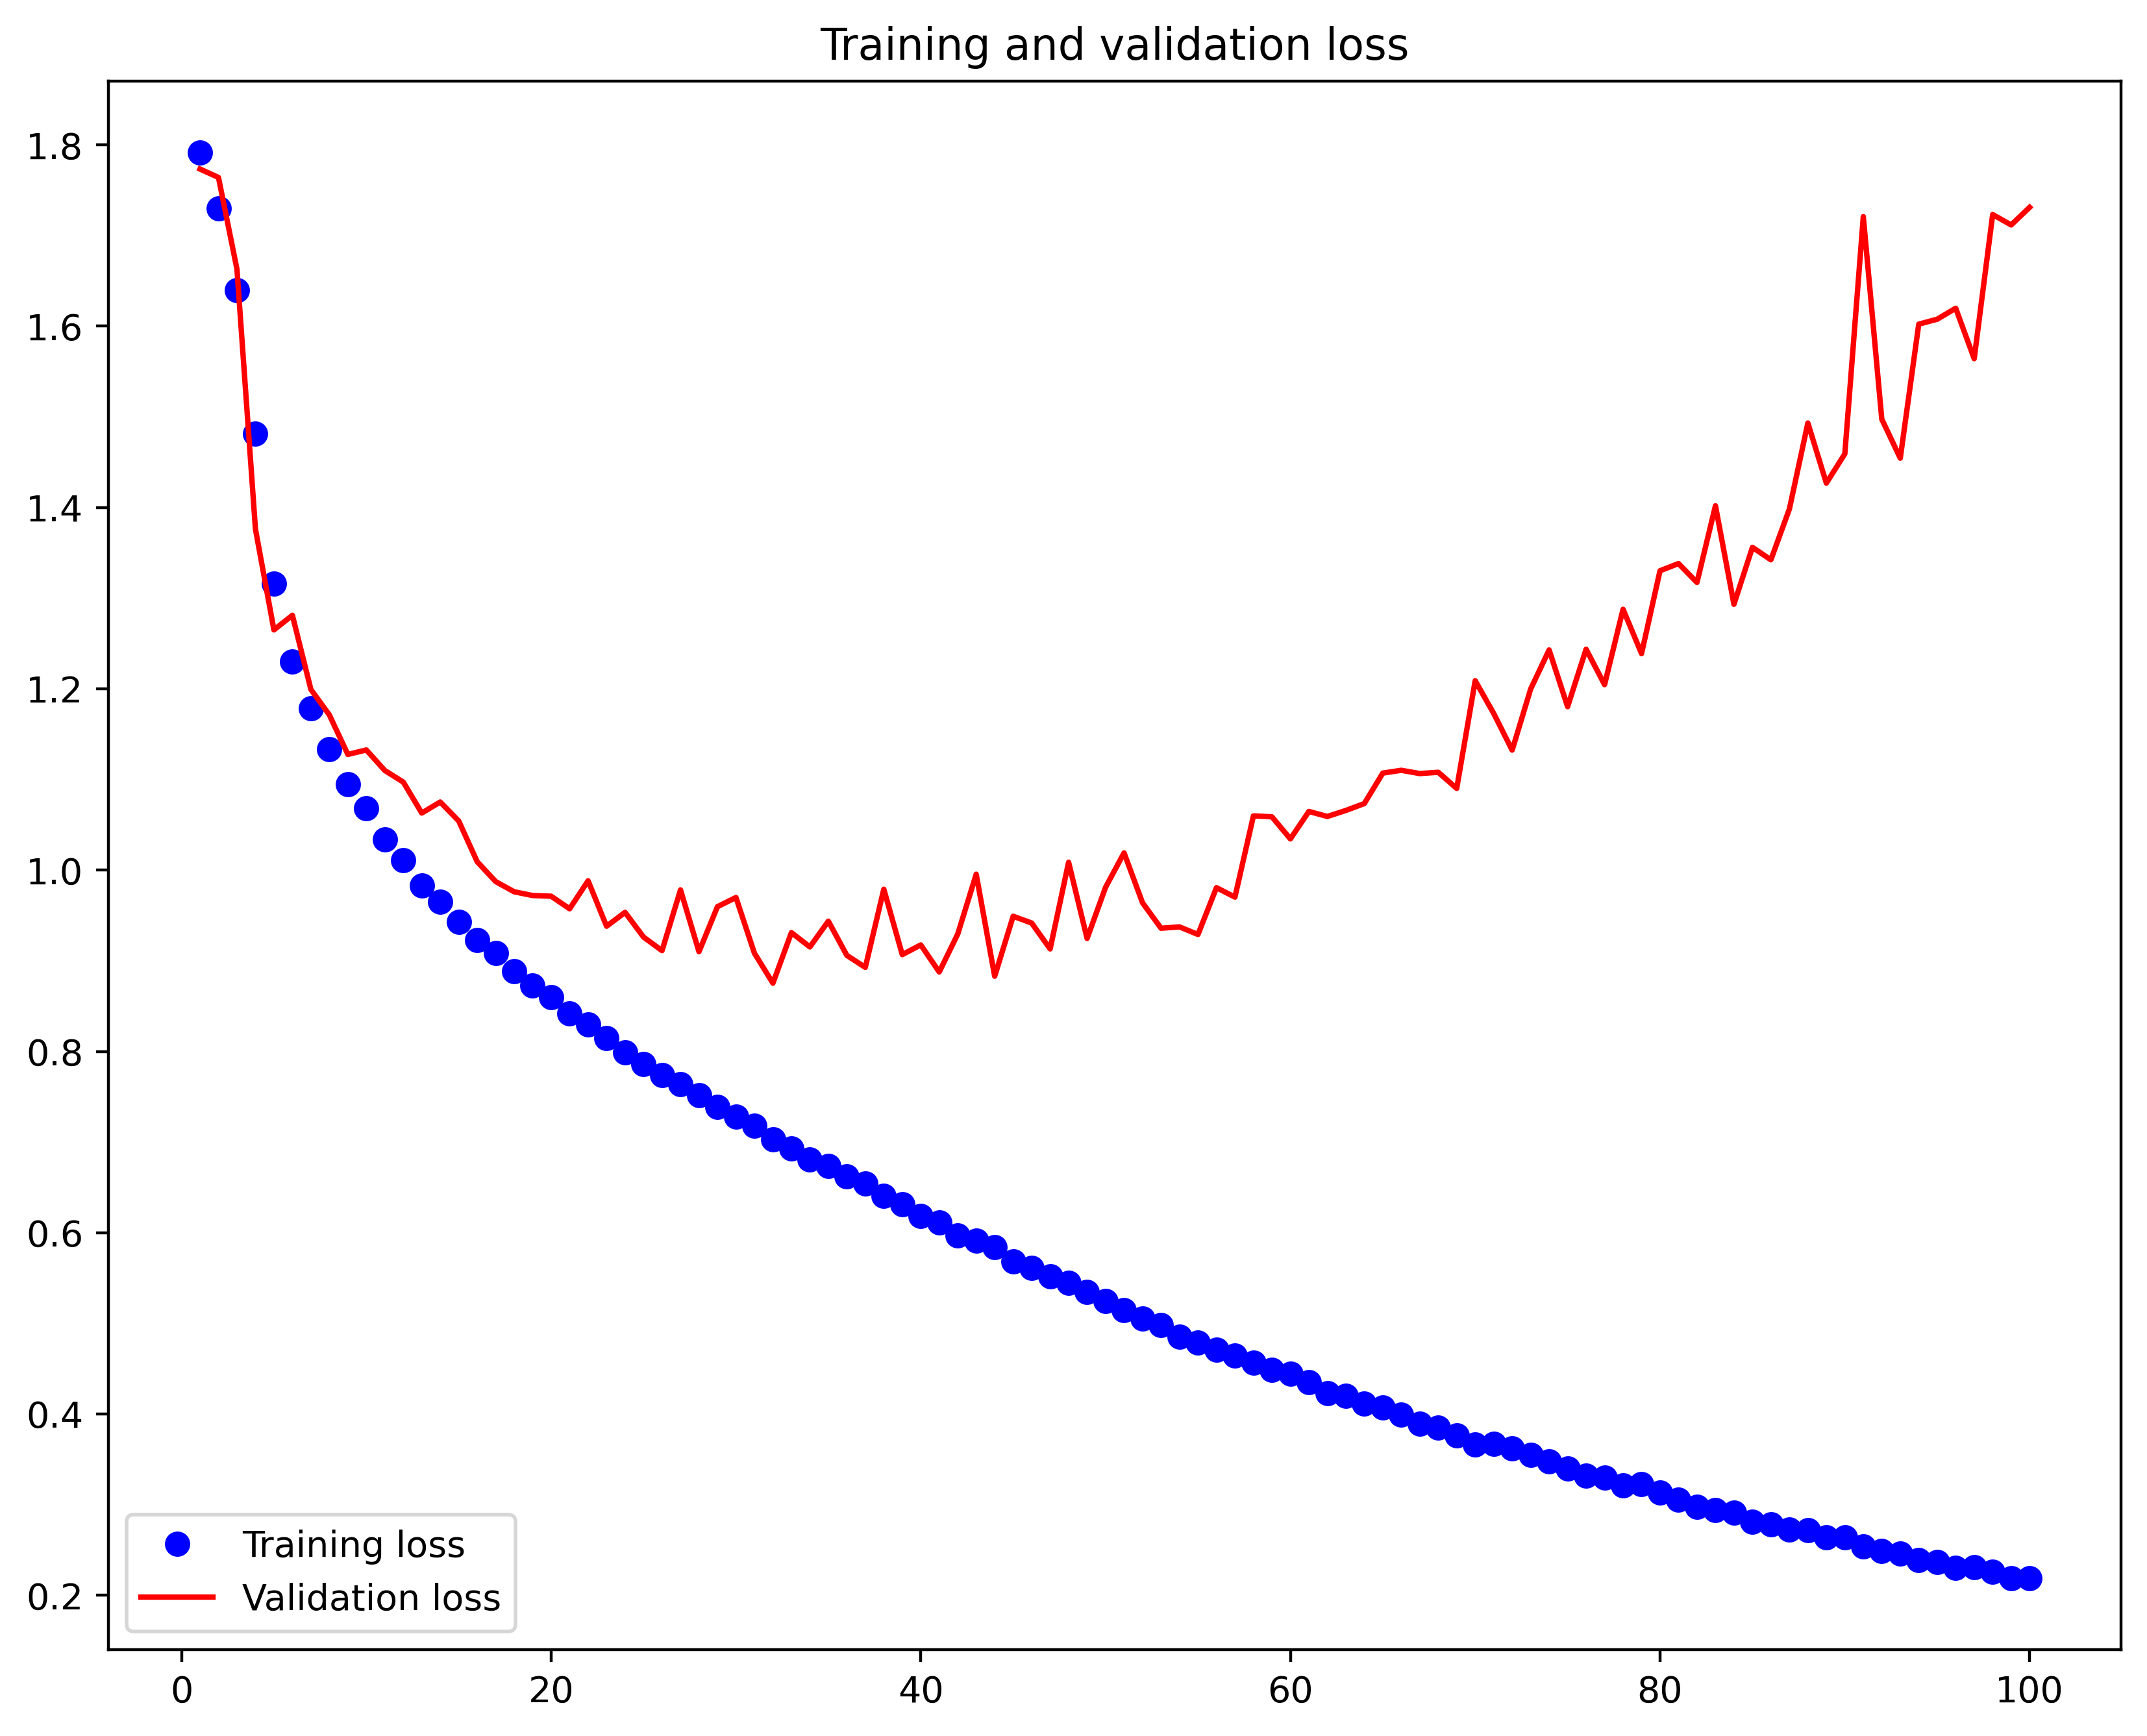

In [69]:
plt.figure(figsize=(10,8),dpi=400)
accuracy = history_0.history["accuracy"]
val_accuracy = history_0.history["val_accuracy"]
loss = history_0.history["loss"]
val_loss = history_0.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy",color="red") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss",color="red") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [89]:
model_0.evaluate(test_generator)

63/63 [==============================] - 1s 8ms/step - loss: 1.6605 - accuracy: 0.7430


[1.660515308380127, 0.7429999709129333]

### Add droput to model

In [44]:
batch_size = 32
image_height = 40
image_width = 24
num_classes = 12

model_1 = Sequential()
model_1.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size= (2,2)))

model_1.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Conv2D(filters = 128, kernel_size=(3,3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))

model_1.add(Flatten()) 
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-3),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 38, 22, 32)        320       
                                                                 
 activation_4 (Activation)   (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 19, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 17, 9, 64)         18496     
                                                                 
 activation_5 (Activation)   (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 4, 64)         0         
 2D)                                                  

In [45]:
history_1 = model_1.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator
 )
model_1.save("/content/drive/MyDrive/models/model_1")

Epoch 1/100
500/500 [==============================] - 6s 11ms/step - loss: 1.8143 - accuracy: 0.5014 - val_loss: 1.7871 - val_accuracy: 0.4865
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 1.7372 - accuracy: 0.5026 - val_loss: 1.7344 - val_accuracy: 0.4900
Epoch 3/100
500/500 [==============================] - 5s 11ms/step - loss: 1.6375 - accuracy: 0.5209 - val_loss: 1.6295 - val_accuracy: 0.5165
Epoch 4/100
500/500 [==============================] - 5s 11ms/step - loss: 1.5661 - accuracy: 0.5403 - val_loss: 1.5330 - val_accuracy: 0.5440
Epoch 5/100
500/500 [==============================] - 5s 11ms/step - loss: 1.4855 - accuracy: 0.5590 - val_loss: 1.4111 - val_accuracy: 0.5760
Epoch 6/100
500/500 [==============================] - 5s 10ms/step - loss: 1.3753 - accuracy: 0.6007 - val_loss: 1.6567 - val_accuracy: 0.4955
Epoch 7/100
500/500 [==============================] - 5s 10ms/step - loss: 1.3119 - accuracy: 0.6149 - val_loss: 1.3753 - val_accuracy:

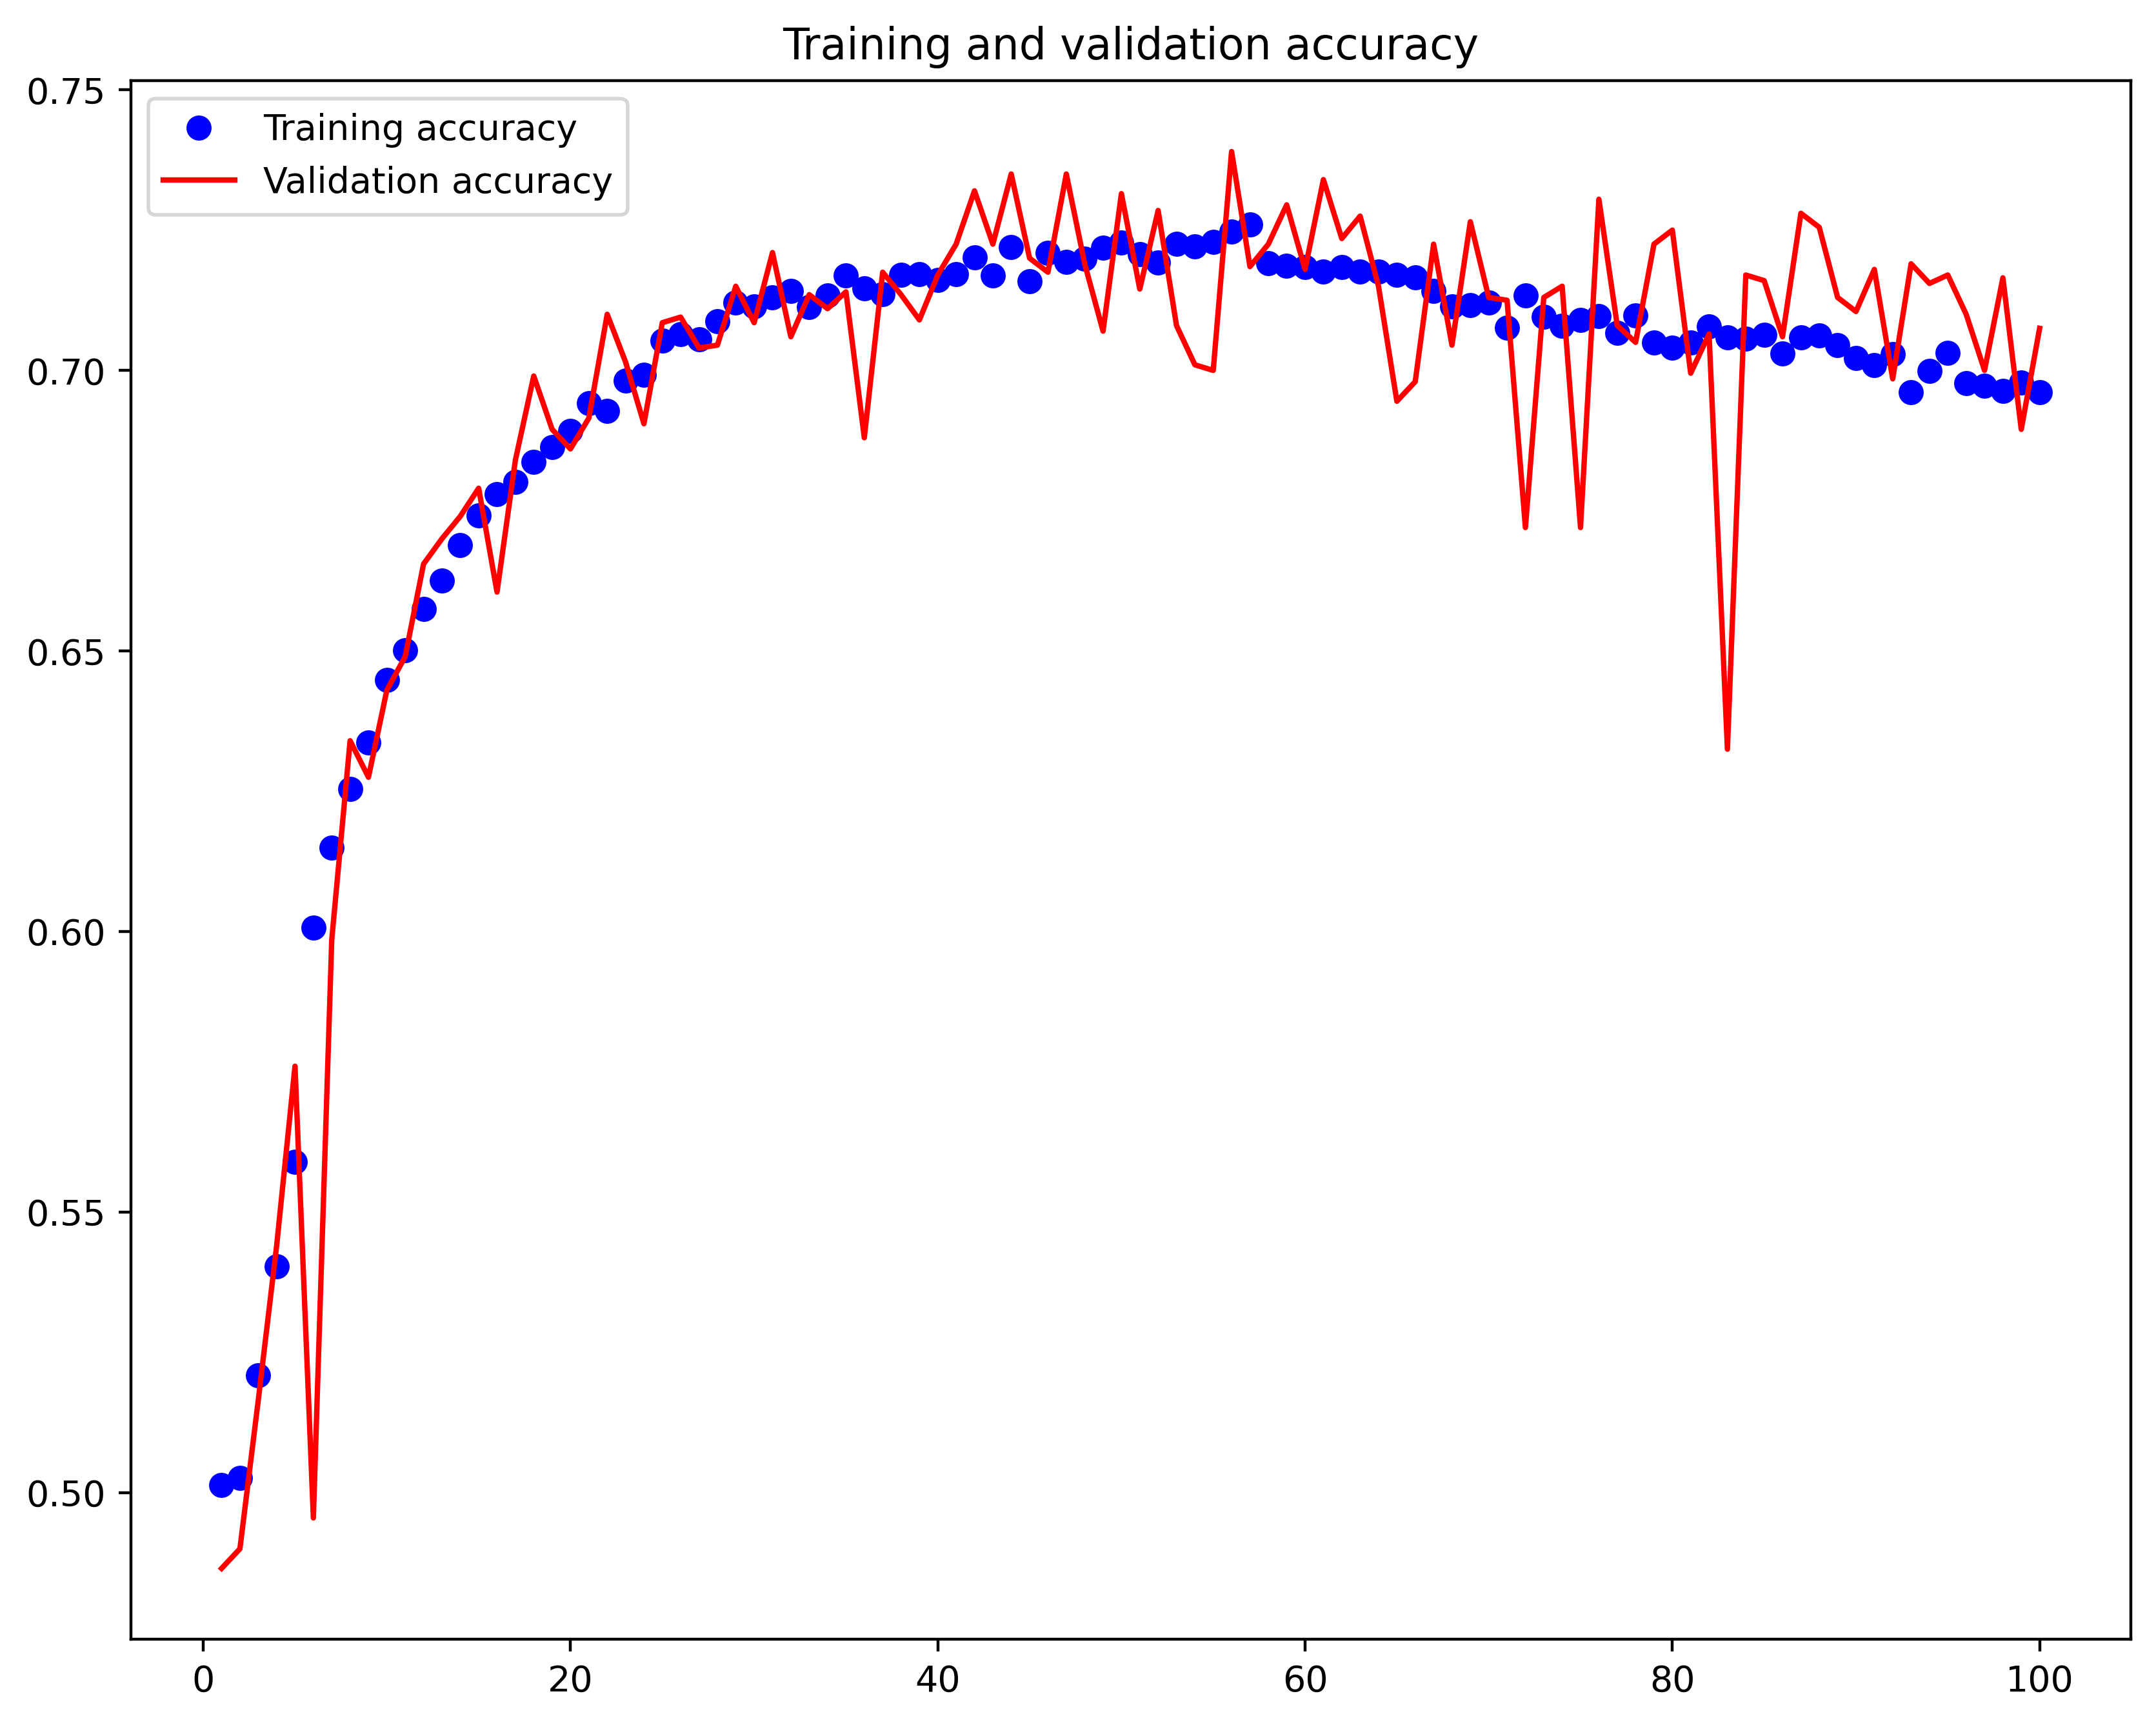

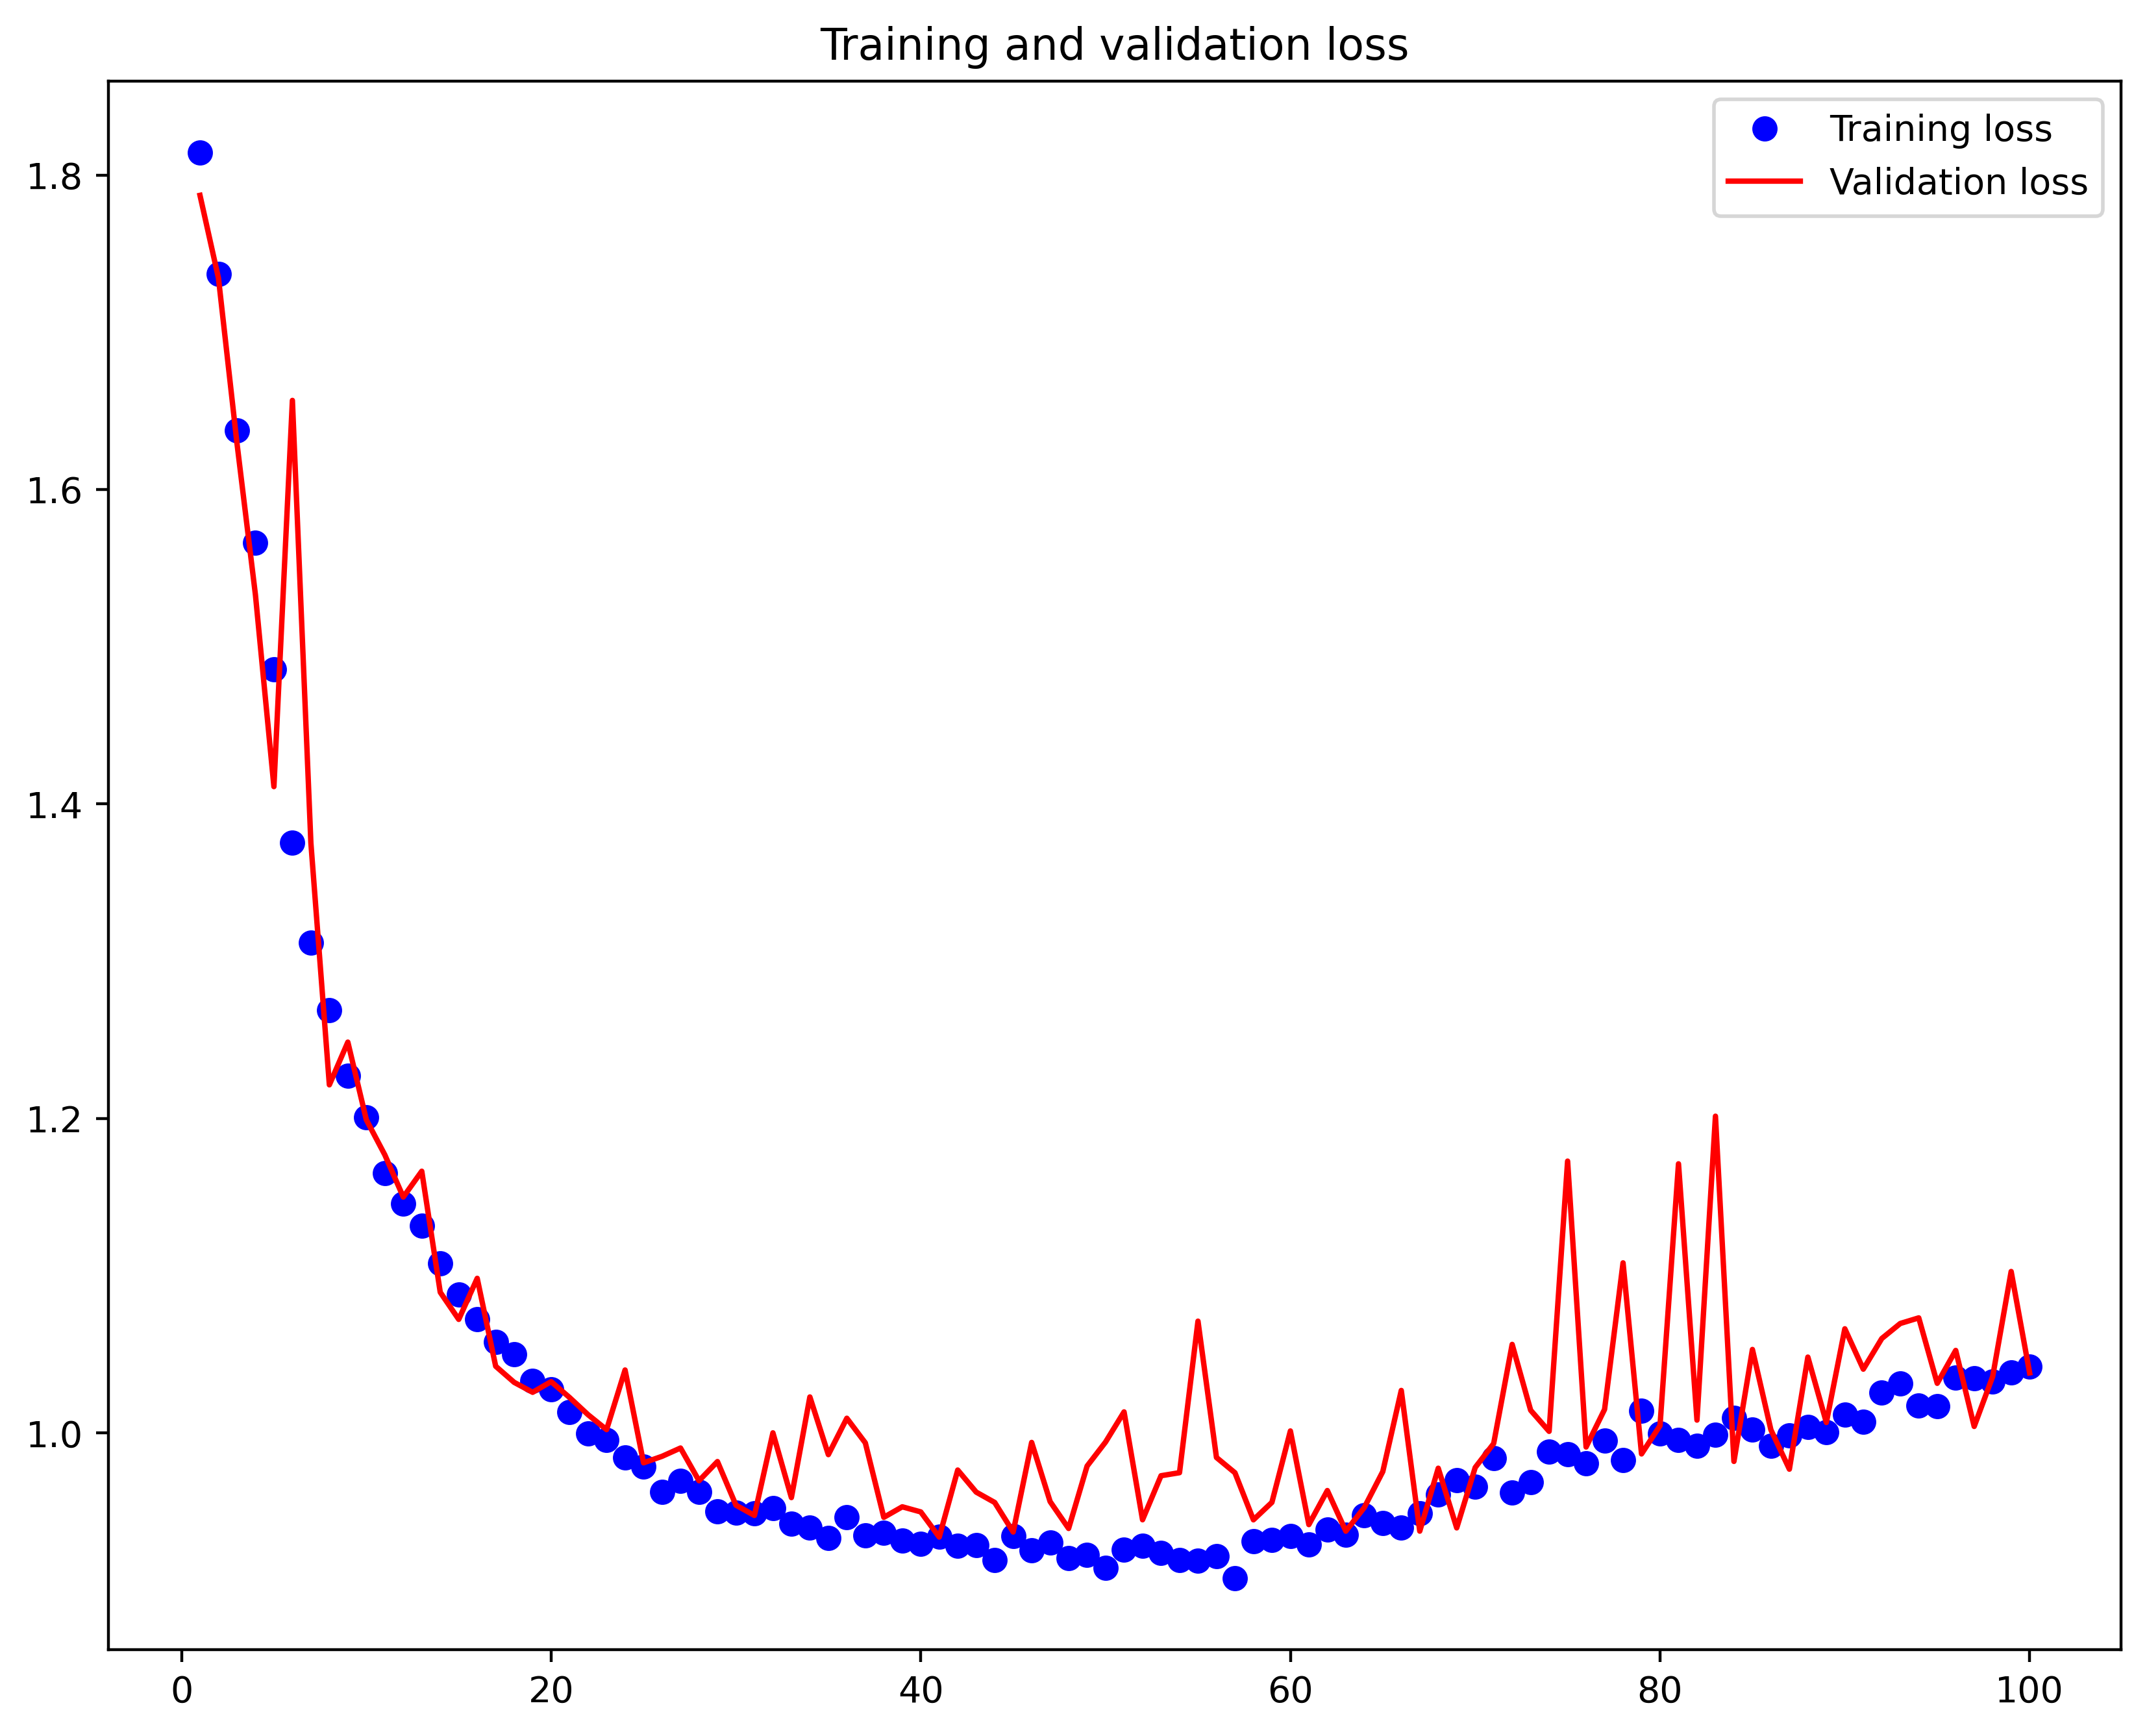

In [71]:
plt.figure(figsize=(10,8),dpi=400)
accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]
loss = history_1.history["loss"]
val_loss = history_1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy",color="red") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss",color="red") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [90]:
model_1.evaluate(test_generator)

63/63 [==============================] - 1s 8ms/step - loss: 1.0084 - accuracy: 0.7140


[1.0083808898925781, 0.7139999866485596]

In [48]:
batch_size = 32
image_height = 40
image_width = 24
num_classes = 12

model_2 = Sequential()
model_2.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size= (2,2)))

model_2.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Conv2D(filters = 128, kernel_size=(3,3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size = (2,2)))

model_2.add(Flatten()) 
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(1e-4),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 22, 32)        320       
                                                                 
 activation_8 (Activation)   (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 19, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 9, 64)         18496     
                                                                 
 activation_9 (Activation)   (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 4, 64)         0         
 2D)                                                  

In [49]:
history_2 = model_2.fit(
    train_generator,
    epochs = 200,
    validation_data = validation_generator
 )
model_2.save("/content/drive/MyDrive/models/model_2")

Epoch 1/200
500/500 [==============================] - 8s 14ms/step - loss: 1.9151 - accuracy: 0.4996 - val_loss: 1.8610 - val_accuracy: 0.4865
Epoch 2/200
500/500 [==============================] - 6s 12ms/step - loss: 1.8342 - accuracy: 0.5023 - val_loss: 1.8270 - val_accuracy: 0.4865
Epoch 3/200
500/500 [==============================] - 6s 12ms/step - loss: 1.7832 - accuracy: 0.5023 - val_loss: 1.7988 - val_accuracy: 0.4865
Epoch 4/200
500/500 [==============================] - 6s 12ms/step - loss: 1.7602 - accuracy: 0.5023 - val_loss: 1.7848 - val_accuracy: 0.4865
Epoch 5/200
500/500 [==============================] - 6s 11ms/step - loss: 1.7537 - accuracy: 0.5023 - val_loss: 1.7841 - val_accuracy: 0.4865
Epoch 6/200
500/500 [==============================] - 6s 11ms/step - loss: 1.7467 - accuracy: 0.5023 - val_loss: 1.7750 - val_accuracy: 0.4865
Epoch 7/200
500/500 [==============================] - 6s 11ms/step - loss: 1.7404 - accuracy: 0.5023 - val_loss: 1.7660 - val_accuracy:

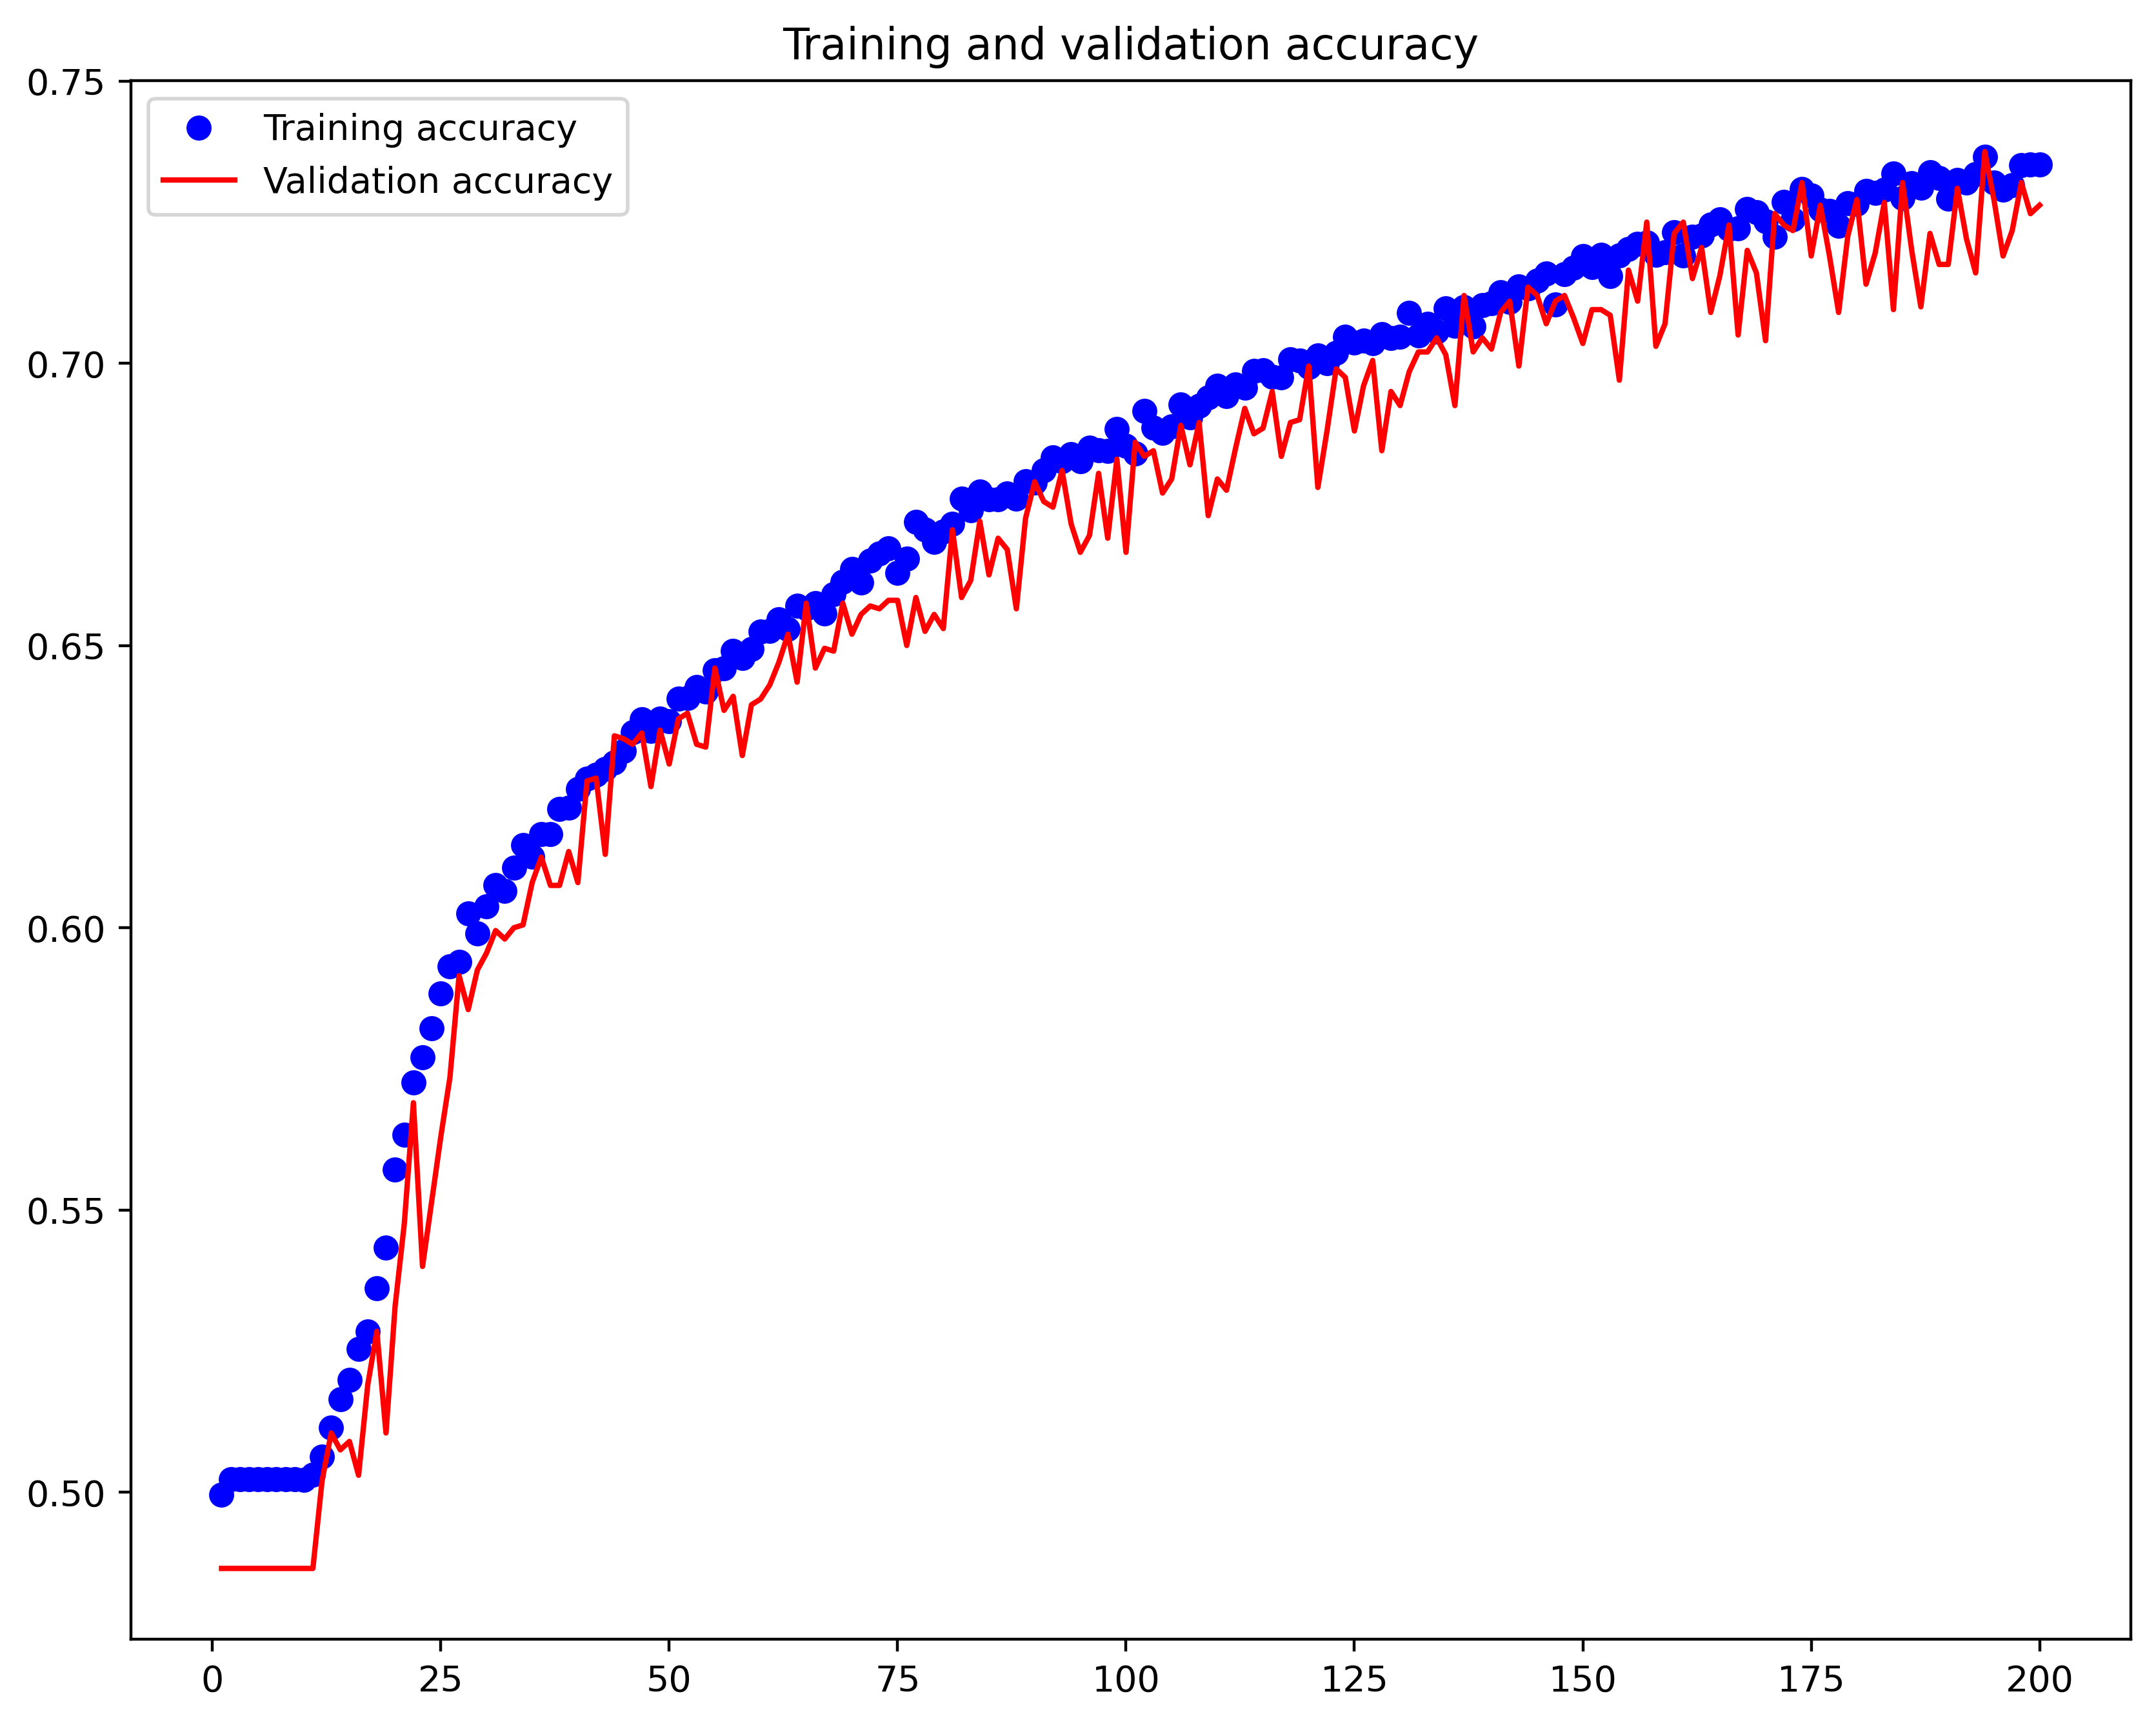

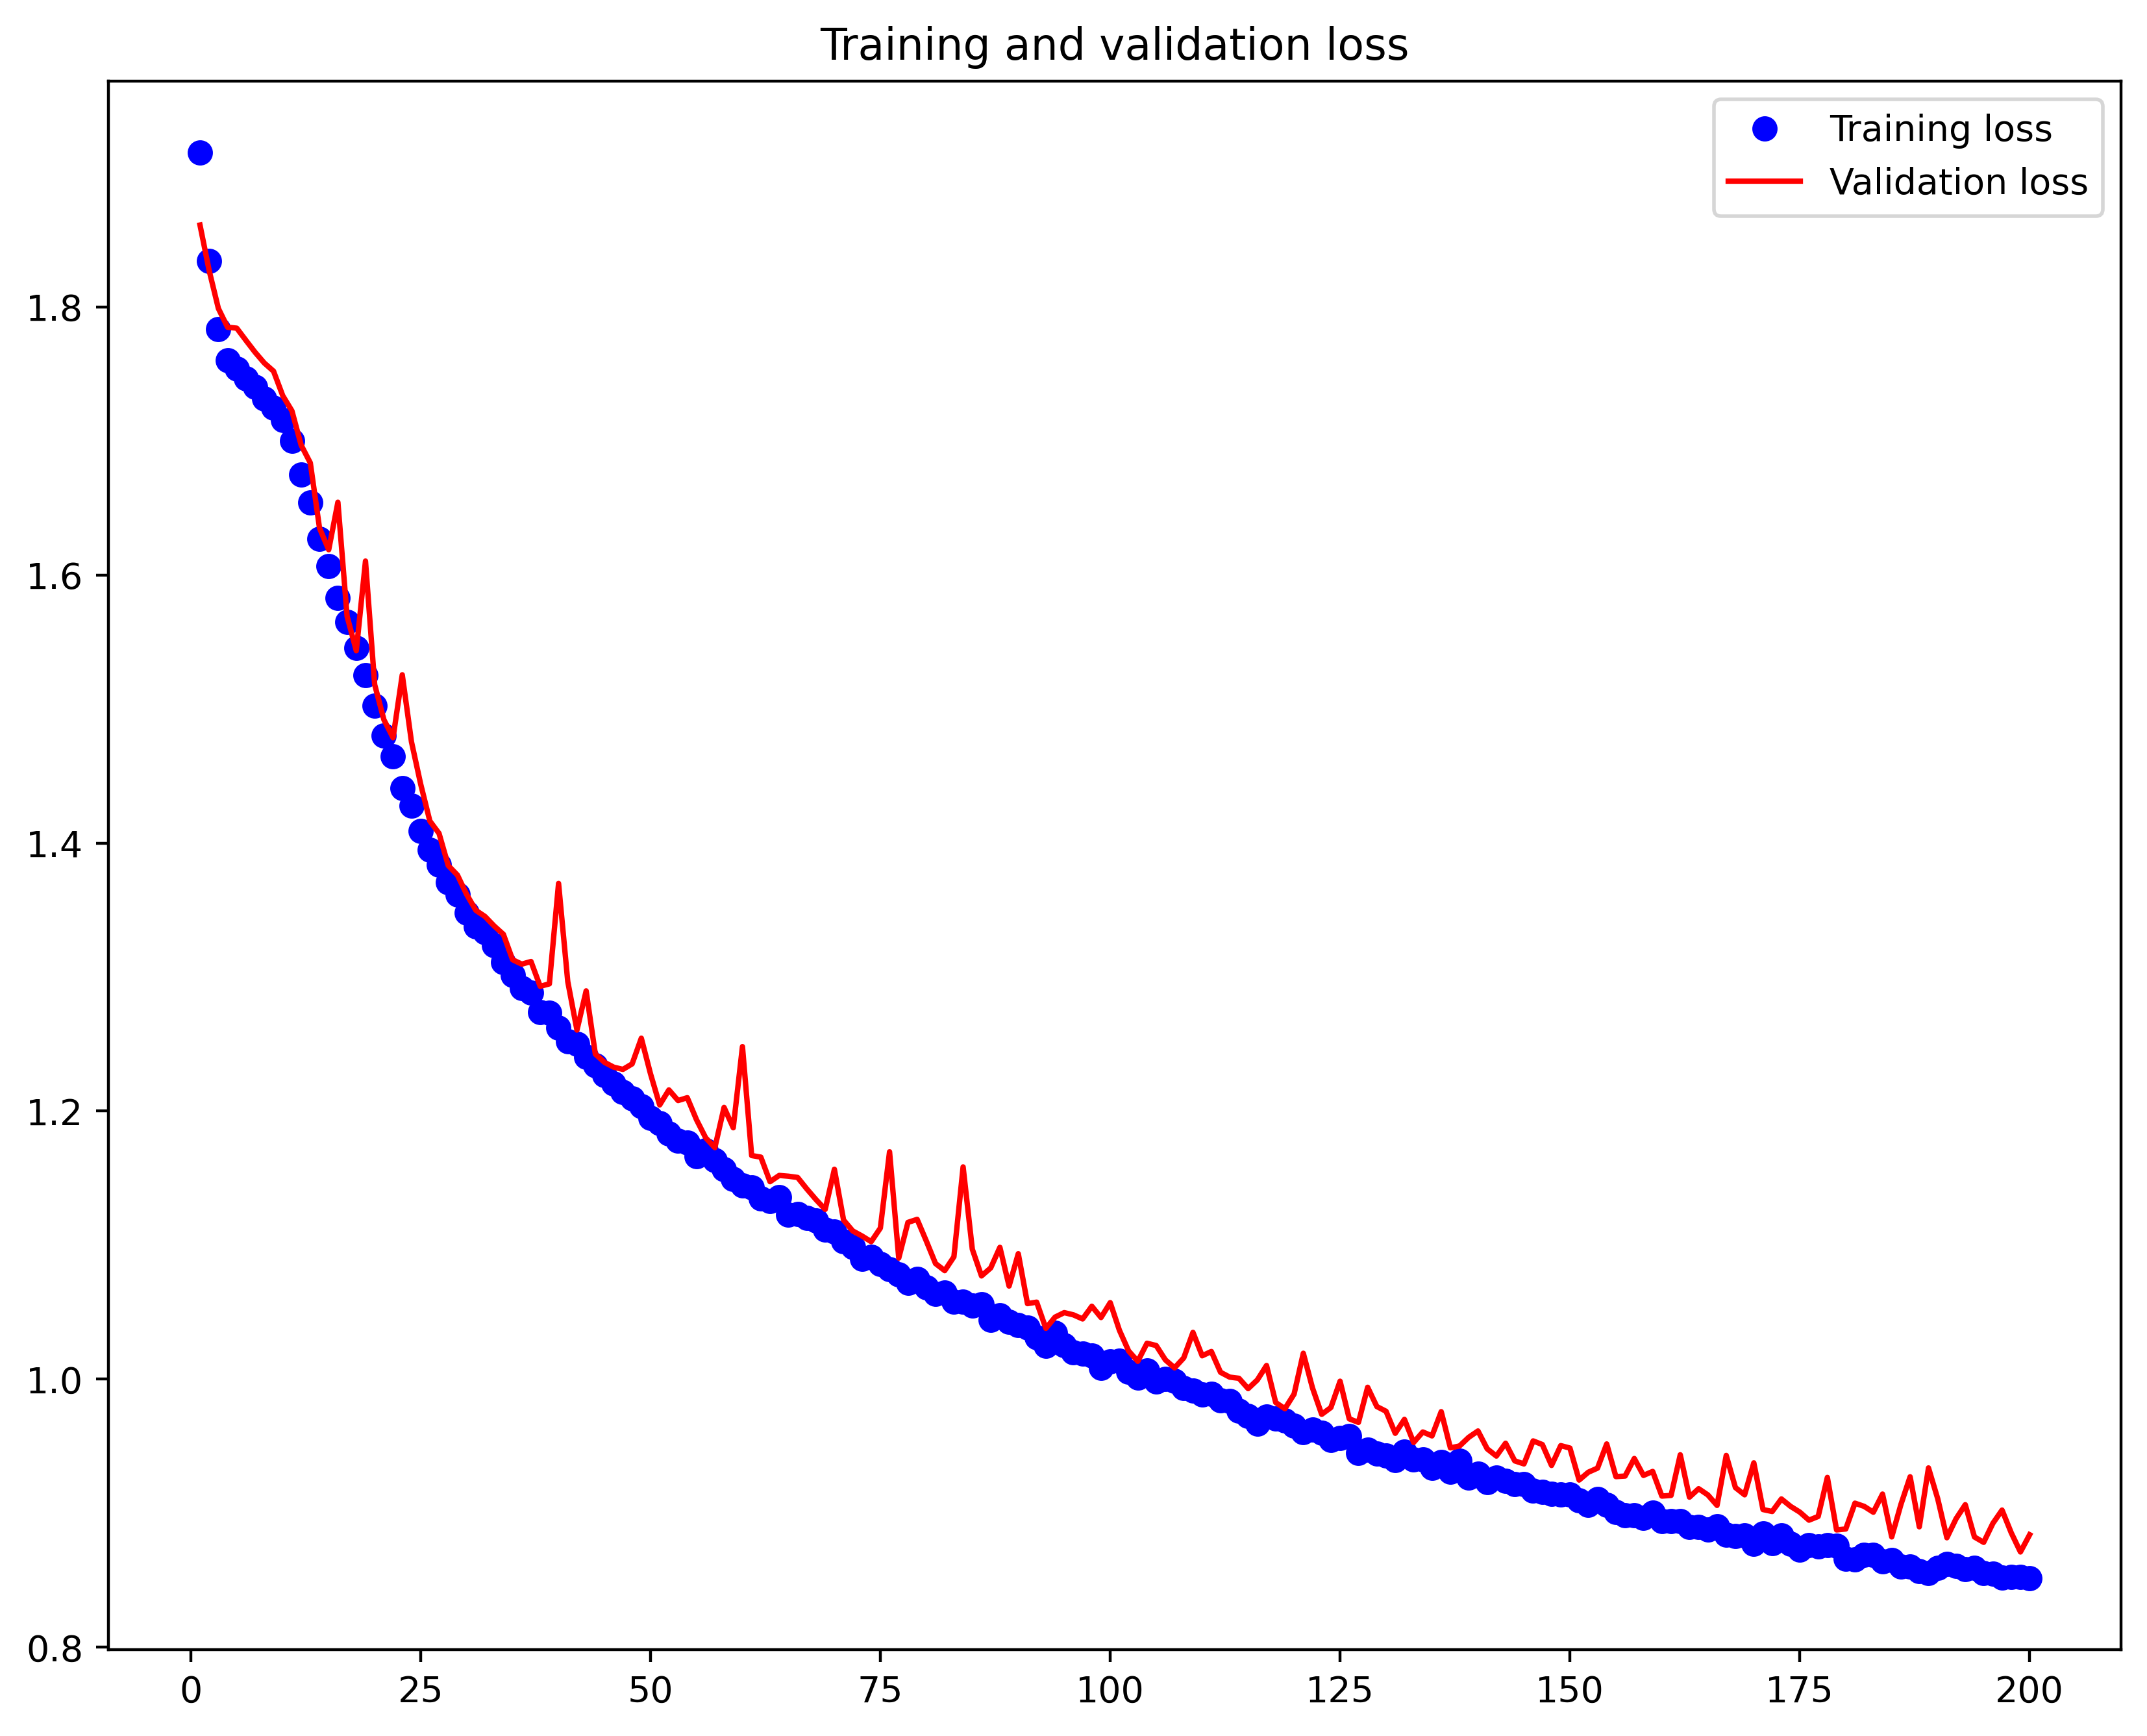

In [73]:
plt.figure(figsize=(10,8),dpi=400)
accuracy = history_2.history["accuracy"]
val_accuracy = history_2.history["val_accuracy"]
loss = history_2.history["loss"]
val_loss = history_2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy",color="red") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss",color="red") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [92]:
model_2.evaluate(test_generator)

63/63 [==============================] - 1s 8ms/step - loss: 0.8739 - accuracy: 0.7145


[0.8739244341850281, 0.7145000100135803]

In [77]:
batch_size = 32
image_height = 40
image_width = 24
num_classes = 12

model_3 = Sequential()
model_3.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size= (2,2)))

model_3.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size = (2,2)))

model_3.add(Conv2D(filters = 128, kernel_size=(3,3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size = (2,2)))

model_3.add(Flatten()) 
model_3.add(Dropout(0.5))
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_16 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_17 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                 

In [78]:
history_3 = model_3.fit(
    train_generator,
    epochs = 150,
    validation_data = validation_generator
 )
model_3.save("/content/drive/MyDrive/models/model_3")

Epoch 1/150
500/500 [==============================] - 6s 11ms/step - loss: 1.8159 - accuracy: 0.5013 - val_loss: 1.8001 - val_accuracy: 0.4865
Epoch 2/150
500/500 [==============================] - 5s 11ms/step - loss: 1.7565 - accuracy: 0.5023 - val_loss: 1.7769 - val_accuracy: 0.4865
Epoch 3/150
500/500 [==============================] - 5s 11ms/step - loss: 1.7437 - accuracy: 0.5023 - val_loss: 1.7814 - val_accuracy: 0.4865
Epoch 4/150
500/500 [==============================] - 5s 10ms/step - loss: 1.7289 - accuracy: 0.5023 - val_loss: 1.7540 - val_accuracy: 0.4865
Epoch 5/150
500/500 [==============================] - 5s 11ms/step - loss: 1.7085 - accuracy: 0.5021 - val_loss: 1.7342 - val_accuracy: 0.4865
Epoch 6/150
500/500 [==============================] - 5s 10ms/step - loss: 1.6560 - accuracy: 0.5136 - val_loss: 1.6786 - val_accuracy: 0.4935
Epoch 7/150
500/500 [==============================] - 5s 10ms/step - loss: 1.6210 - accuracy: 0.5238 - val_loss: 1.6006 - val_accuracy:

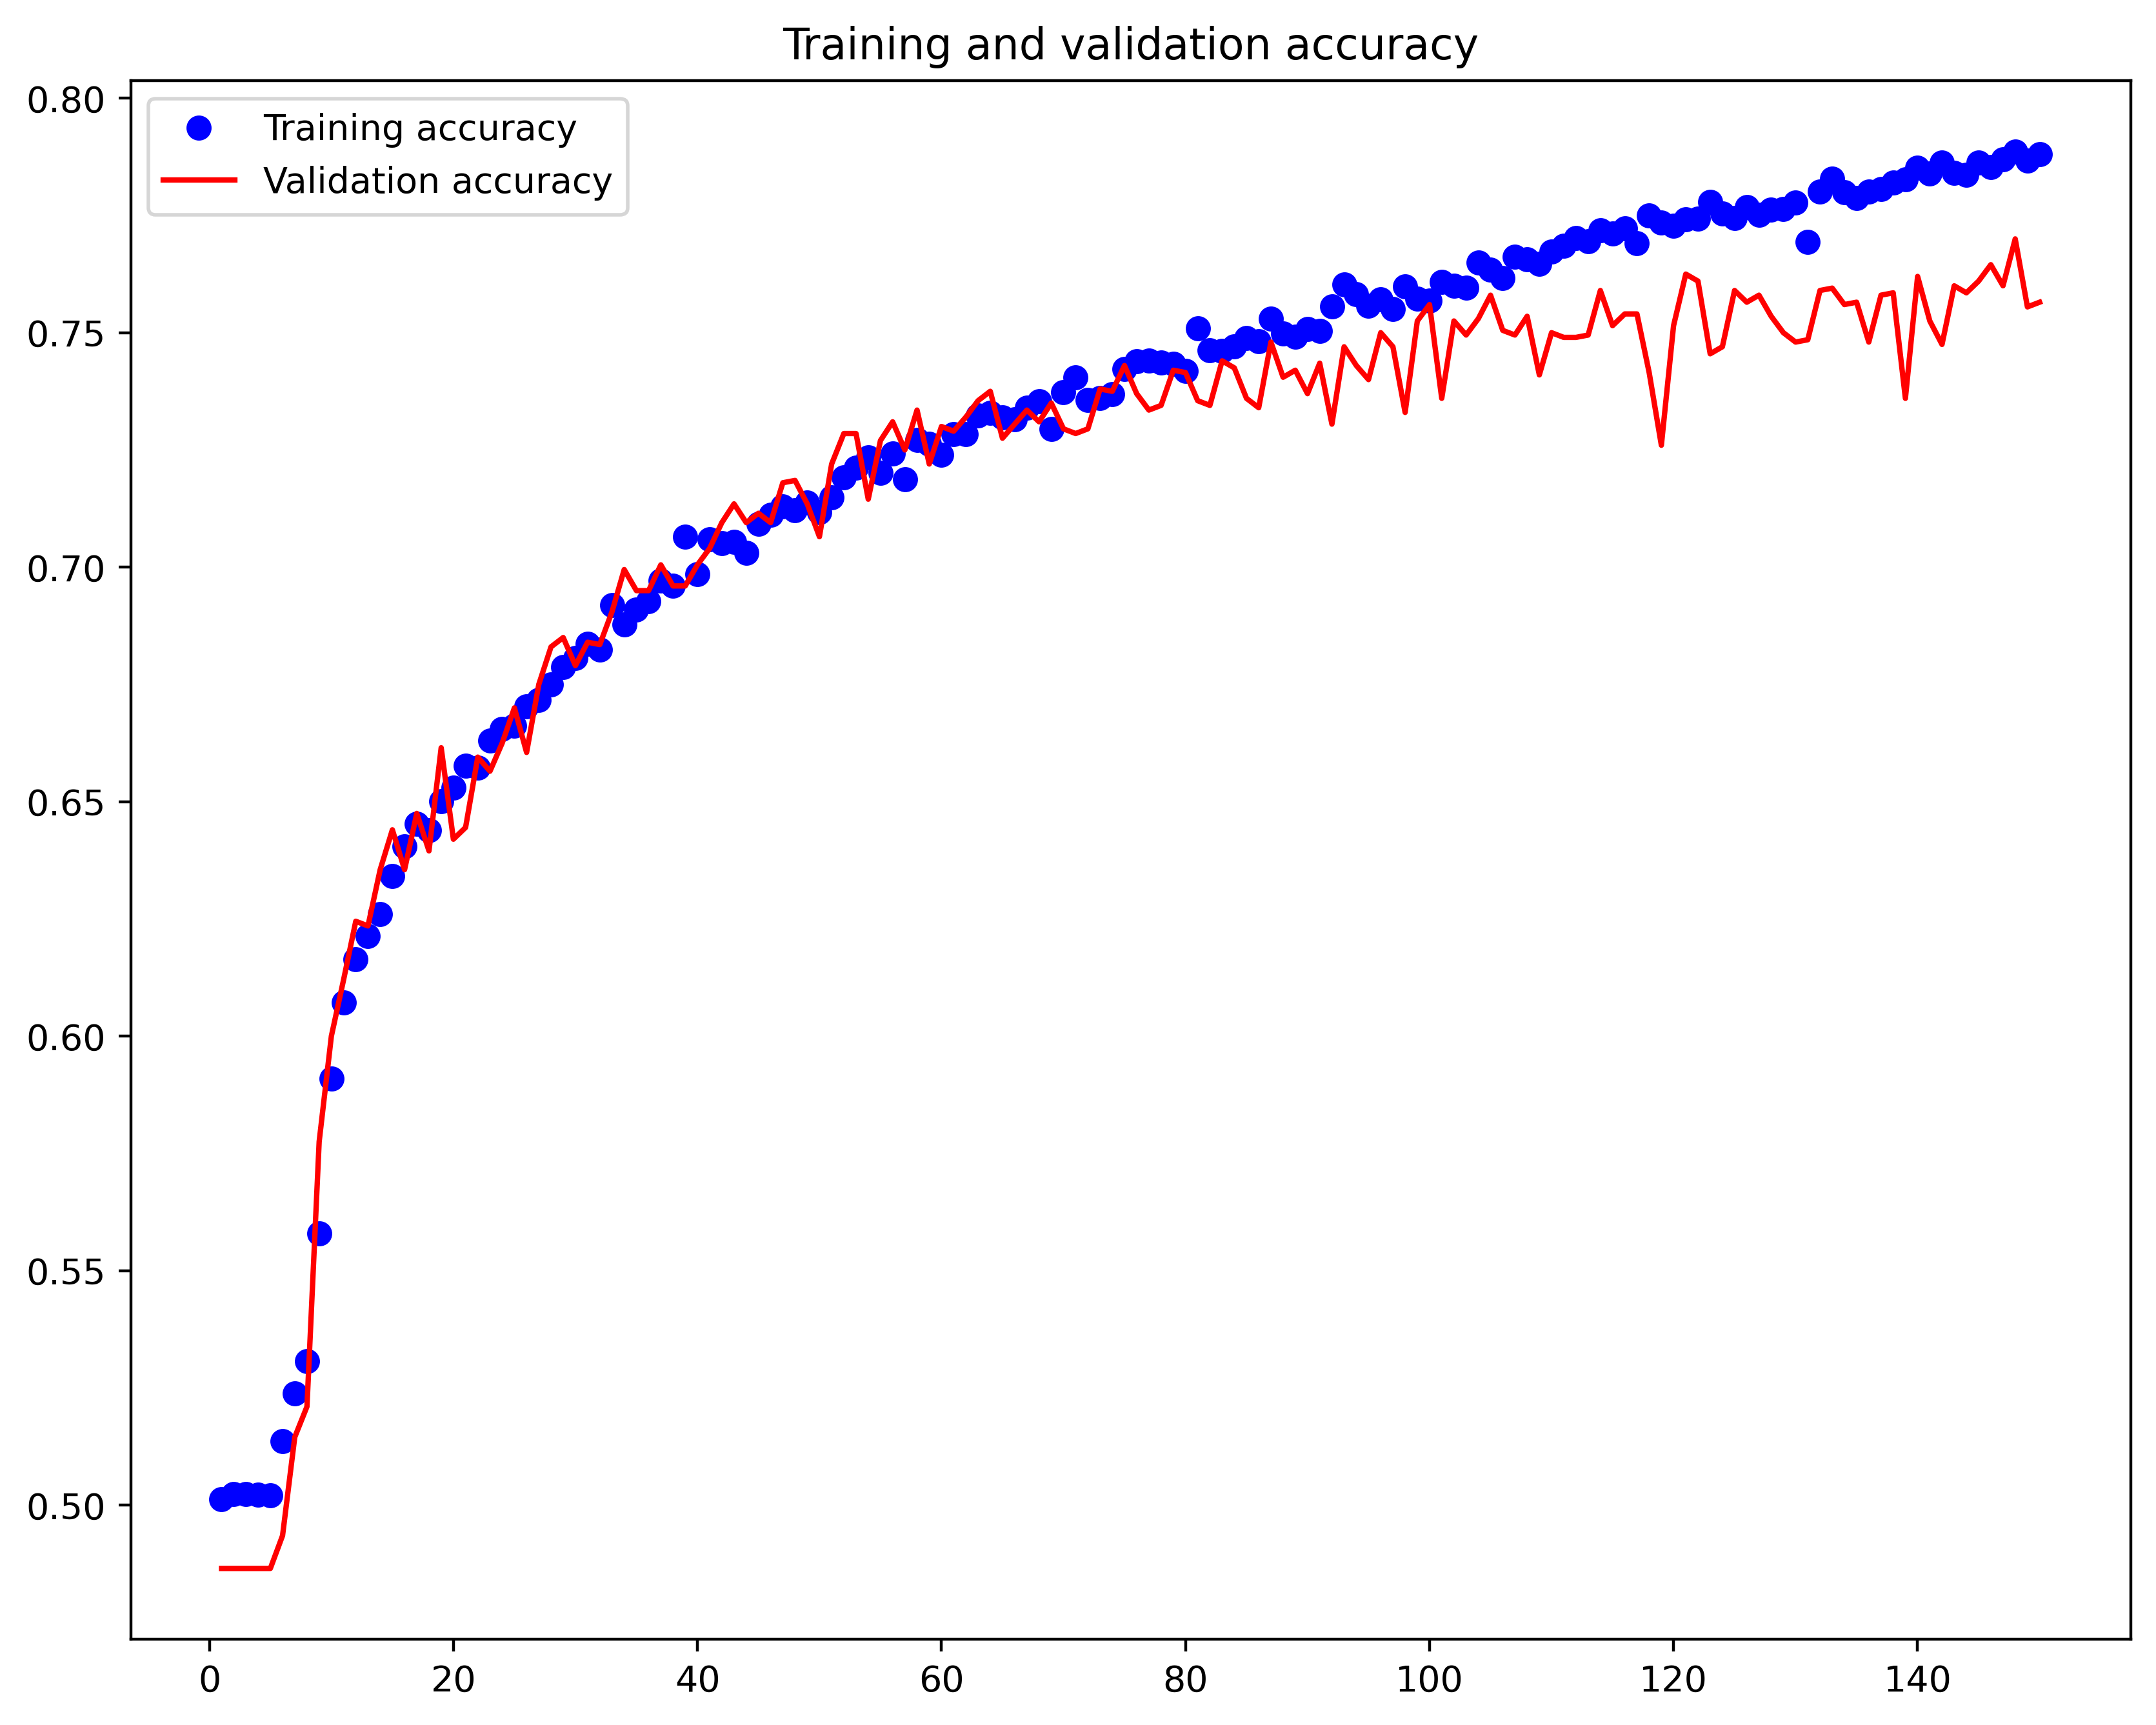

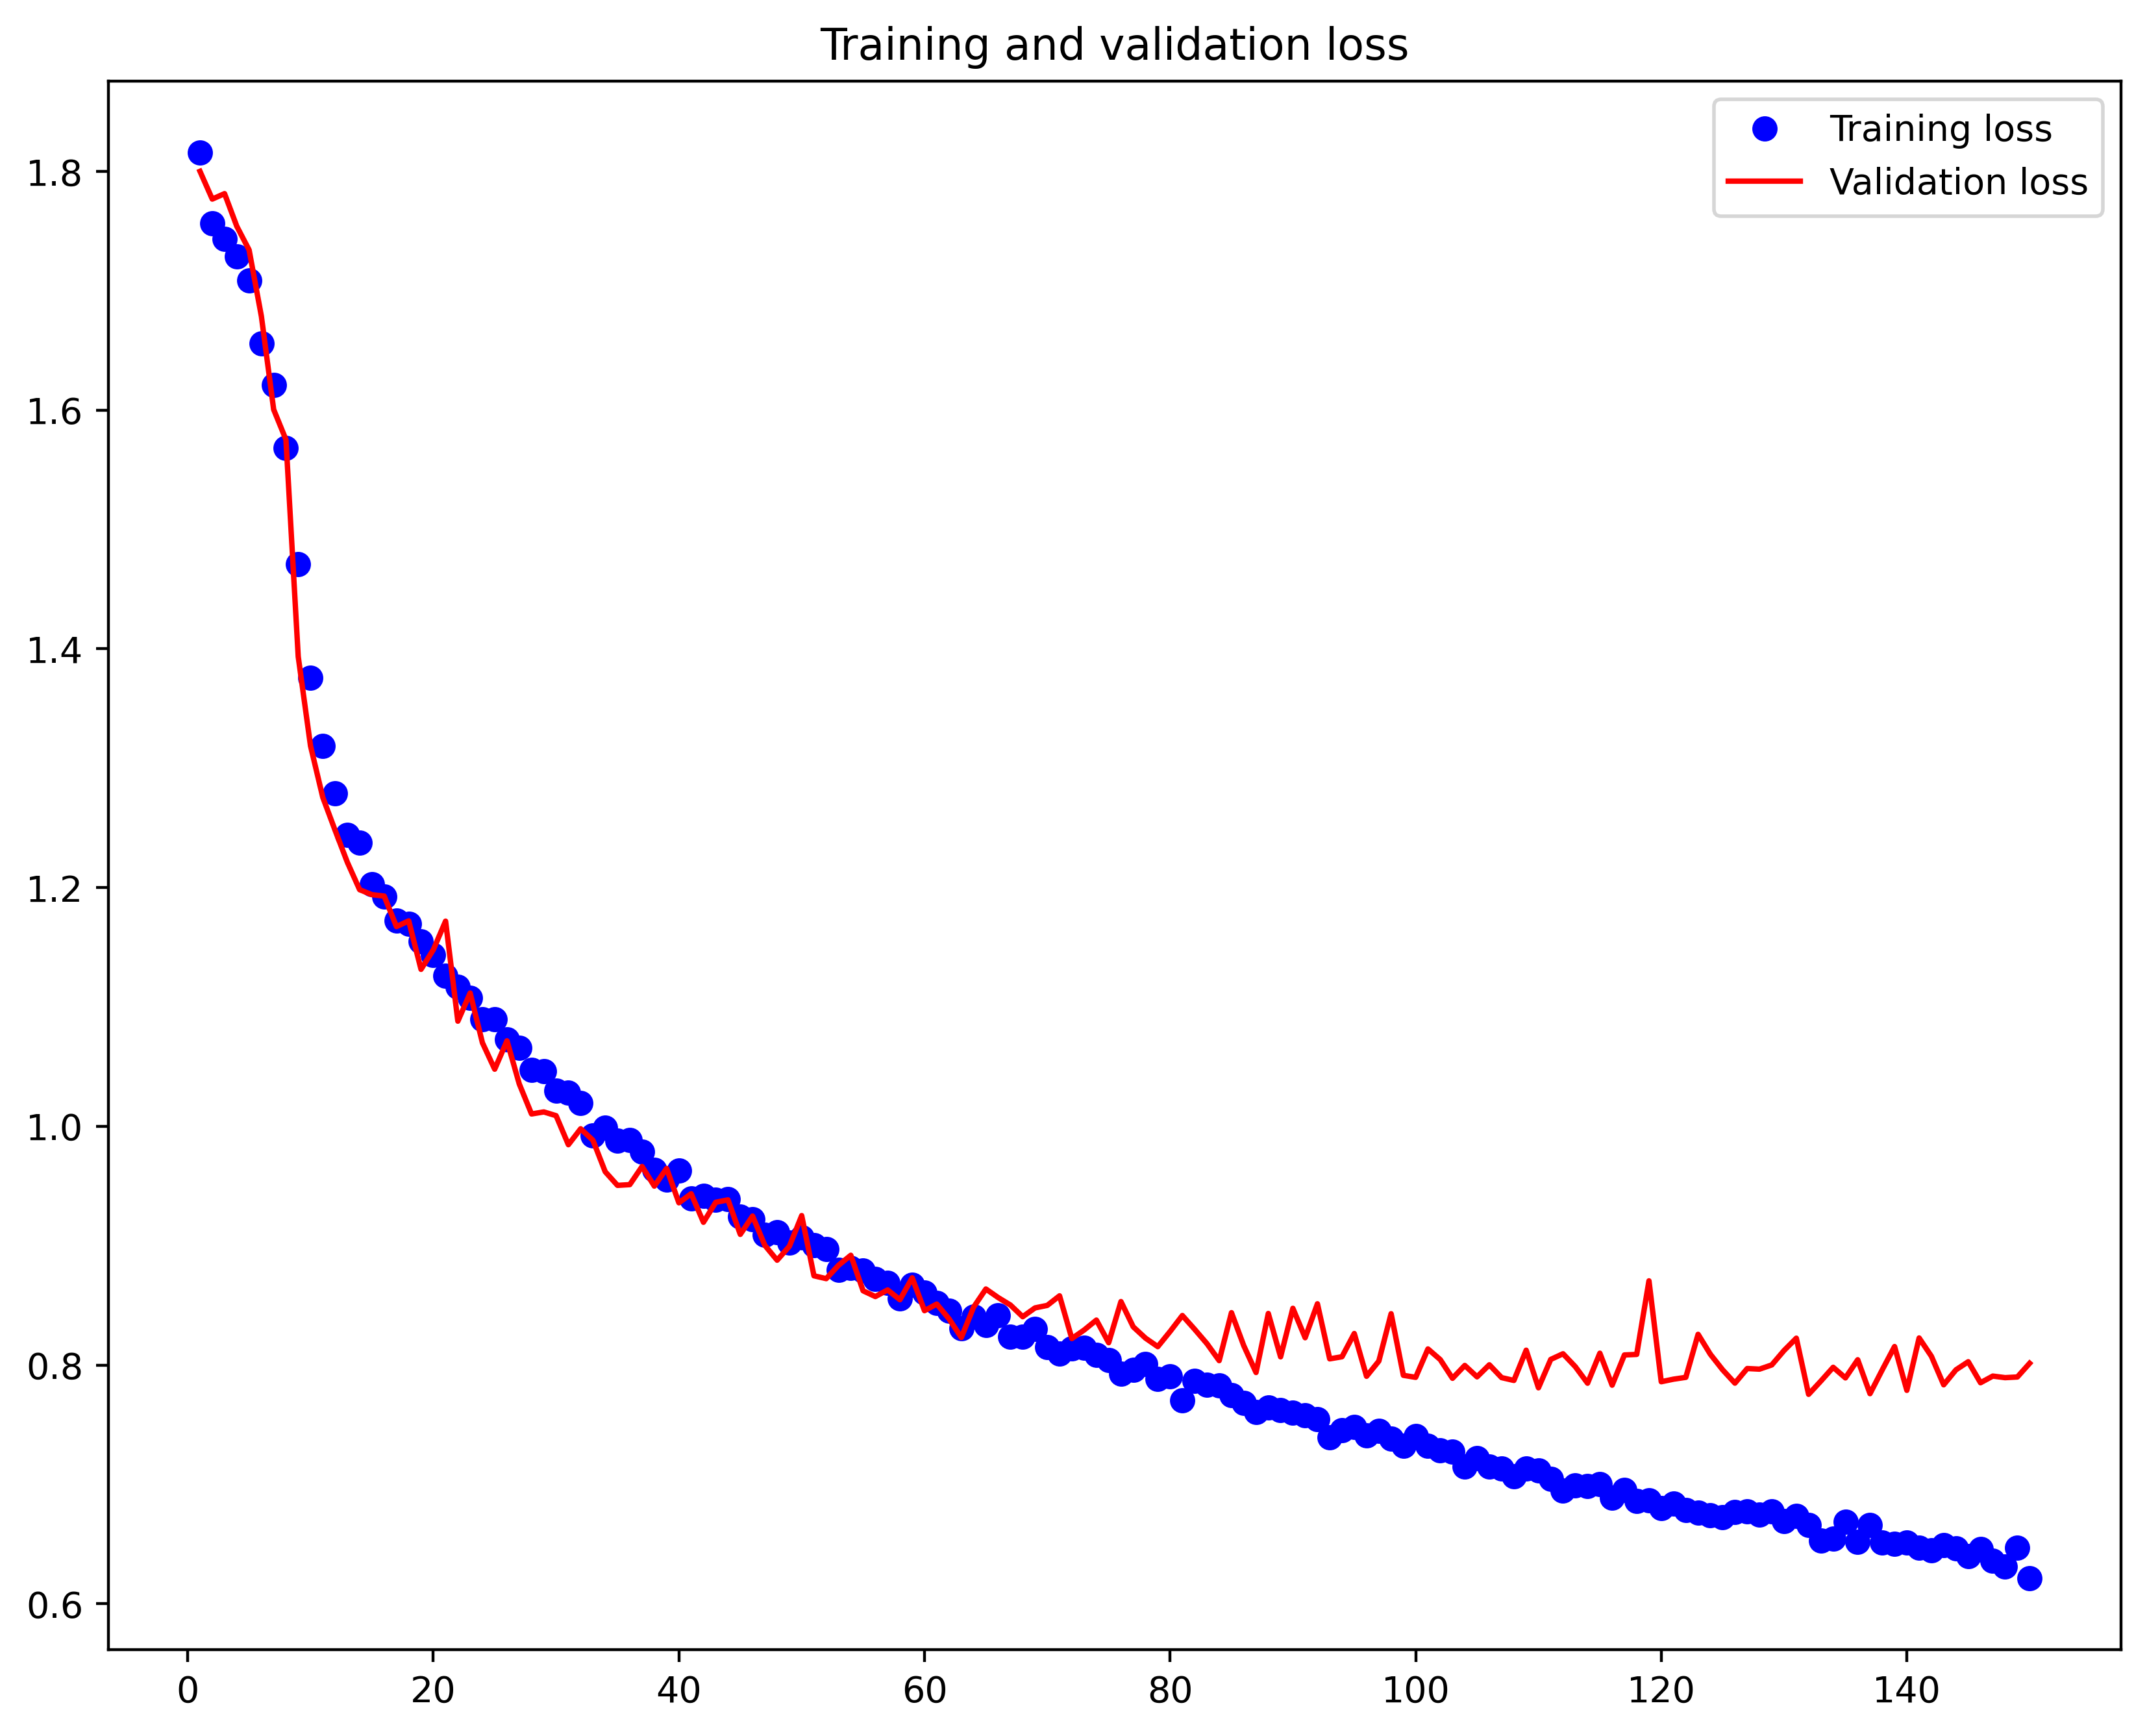

In [80]:
plt.figure(figsize=(10,8),dpi=400)
accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy",color="red") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss",color="red") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [93]:
history_3 = model_3.evaluate(test_generator)

63/63 [==============================] - 1s 9ms/step - loss: 0.8335 - accuracy: 0.7525


In [56]:
#model_3 = tf.keras.models.load_model("/content/drive/MyDrive/models/model_3")

## Evaluate best model


### Create Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys

x = list(train_generator.class_indices.keys())
num_of_test_samples = 2000

Y_pred = model_3.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print()
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

print()
print('Classification Report')
target_names = x
print(classification_report(test_generator.classes, y_pred, target_names = target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  



Confusion Matrix
[[ 12   9  10  18   1   2   4 103   4   7   0  12]
 [  9   7   6   6   2   1   0  66   3   8   0  12]
 [  7   6   8   2   1   0   1  63   0   7   1  11]
 [ 15   6  12  13   1   1   1  77   3   2   0  13]
 [  1   1   0   2   0   0   0  10   0   0   0   4]
 [  5   1   0   1   0   0   0  15   0   1   0   2]
 [  4   1   0   3   0   0   1  17   0   1   0   4]
 [ 84  48  57  72   6   6  13 561  15  44   5  79]
 [ 10   1   5   1   0   2   1  54   2   4   0   7]
 [  7  11   9   5   2   1   1  66   2   4   0   5]
 [  3   1   0   1   0   0   0  10   0   0   0   0]
 [ 12   7   8  10   0   3   2  96   2   8   1  19]]

Classification Report
                precision    recall  f1-score   support

          Cell       0.07      0.07      0.07       182
    Cell-Multi       0.07      0.06      0.06       120
      Cracking       0.07      0.07      0.07       107
         Diode       0.10      0.09      0.09       144
   Diode-Multi       0.00      0.00      0.00        18
      Hot

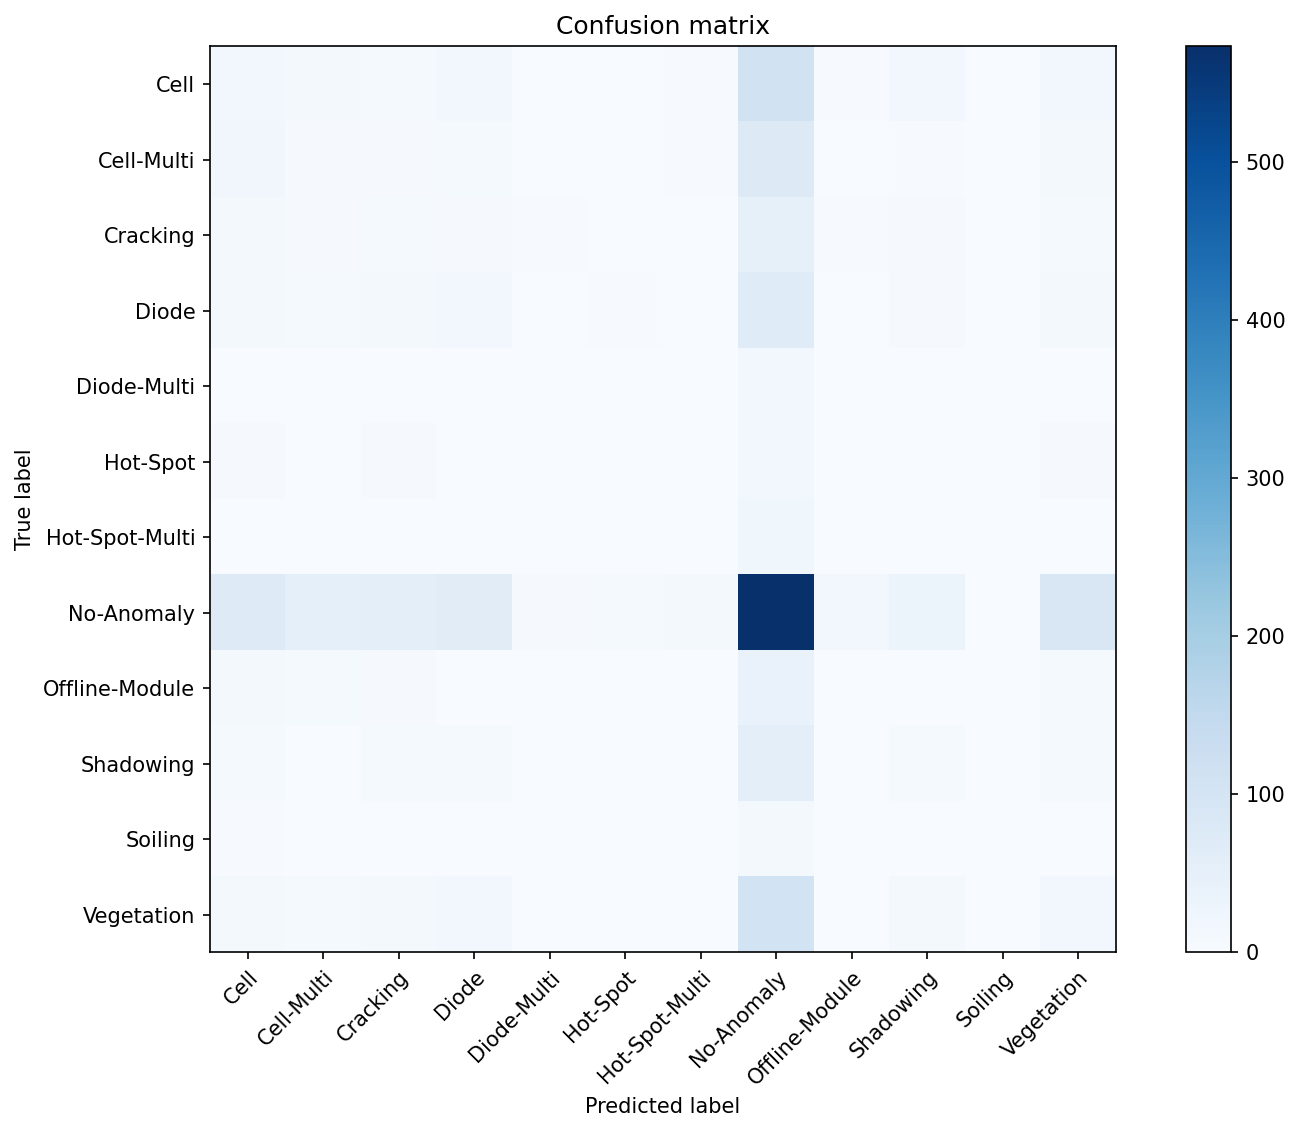

In [137]:
cm = confusion_matrix(validation_generator.classes, y_pred)
fig, ax = plt.subplots(figsize=(12,8),dpi=150)
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
title = 'Confusion matrix'
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=target_names, yticklabels=target_names,
    title=title,
    ylabel='True label',
    xlabel='Predicted label',
    )
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
np.set_printoptions(precision=2)
plt.show()

## Use of only 2 classes for classification

In [94]:
df_2 = df
df_2['anomaly_class'] = np.where((df_2['anomaly_class'] != 'No-Anomaly'),'Anomaly',df_2['anomaly_class'])
df_2

,image_filepath,anomaly_class,image_name
13357,images/13357.jpg,No-Anomaly,13357.jpg
13356,images/13356.jpg,No-Anomaly,13356.jpg
19719,images/19719.jpg,No-Anomaly,19719.jpg
11542,images/11542.jpg,No-Anomaly,11542.jpg
11543,images/11543.jpg,No-Anomaly,11543.jpg
...,...,...,...
8488,images/8488.jpg,Anomaly,8488.jpg
8489,images/8489.jpg,Anomaly,8489.jpg
7464,images/7464.jpg,Anomaly,7464.jpg
18065,images/18065.jpg,No-Anomaly,18065.jpg


In [108]:
reduced_df=df_2.sample(frac=1,random_state=200) # random state is a seed value
train_df=reduced_df.sample(frac=0.8,random_state=200) # random state is a seed value
validation_test_df=reduced_df.drop(train_df.index)
validation_df=validation_test_df.sample(frac=0.5,random_state=200)
test_df=validation_test_df.drop(validation_df.index)
print(train_df.info())
print(validation_df.info())
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16000 entries, 10209 to 2938
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  16000 non-null  object
 1   anomaly_class   16000 non-null  object
 2   image_name      16000 non-null  object
dtypes: object(3)
memory usage: 500.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 14835 to 11344
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  2000 non-null   object
 1   anomaly_class   2000 non-null   object
 2   image_name      2000 non-null   object
dtypes: object(3)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 2358 to 8045
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   image_filepath  2000 non-null   object
 1  

In [133]:
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_validation=ImageDataGenerator(rescale=1./255)

train_generator_2 = datagen_train.flow_from_dataframe(
    dataframe = train_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
    color_mode = "grayscale"
)

validation_generator_2 = datagen_validation.flow_from_dataframe(
    dataframe = validation_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

test_generator_2 = datagen_validation.flow_from_dataframe(
    dataframe = test_df,
    directory = "/content/InfraredSolarModules/images/",
    x_col = "image_name",
    y_col = "anomaly_class",
    class_mode = "categorical",
    target_size = (image_height, image_width),
    batch_size = batch_size,
     color_mode = "grayscale"
)

Found 16000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.
Found 2000 validated image filenames belonging to 2 classes.


In [110]:
batch_size = 32
image_height = 40
image_width = 24
num_classes = 2

model_4 = Sequential()
model_4.add(Conv2D(filters = 32, kernel_size=(3,3), input_shape=(image_height, image_width, 1)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size= (2,2)))

model_4.add(Conv2D(filters = 64, kernel_size=(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size = (2,2)))

model_4.add(Conv2D(filters = 128, kernel_size=(3,3)))
model_4.add(Activation('relu'))
model_4.add(MaxPooling2D(pool_size = (2,2)))

model_4.add(Flatten()) 
model_4.add(Dropout(0.5))
model_4.add(Dense(num_classes))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 38, 22, 32)        320       
                                                                 
 activation_28 (Activation)  (None, 38, 22, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 19, 11, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 17, 9, 64)         18496     
                                                                 
 activation_29 (Activation)  (None, 17, 9, 64)         0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 4, 64)         0         
 g2D)                                                 

In [111]:
history_4 = model_4.fit(
    train_generator_2,
    epochs = 60,
    validation_data = validation_generator_2
 )

model_4.save("/content/drive/MyDrive/models/model_4")

Epoch 1/60
500/500 [==============================] - 6s 10ms/step - loss: 0.6755 - accuracy: 0.5727 - val_loss: 0.6579 - val_accuracy: 0.5910
Epoch 2/60
500/500 [==============================] - 5s 10ms/step - loss: 0.6039 - accuracy: 0.6667 - val_loss: 0.5456 - val_accuracy: 0.7195
Epoch 3/60
500/500 [==============================] - 5s 10ms/step - loss: 0.4908 - accuracy: 0.7627 - val_loss: 0.4632 - val_accuracy: 0.7820
Epoch 4/60
500/500 [==============================] - 5s 10ms/step - loss: 0.4584 - accuracy: 0.7846 - val_loss: 0.4325 - val_accuracy: 0.8090
Epoch 5/60
500/500 [==============================] - 5s 10ms/step - loss: 0.4325 - accuracy: 0.8032 - val_loss: 0.4312 - val_accuracy: 0.8140
Epoch 6/60
500/500 [==============================] - 6s 11ms/step - loss: 0.4179 - accuracy: 0.8144 - val_loss: 0.4212 - val_accuracy: 0.8005
Epoch 7/60
500/500 [==============================] - 5s 10ms/step - loss: 0.4006 - accuracy: 0.8219 - val_loss: 0.3829 - val_accuracy: 0.8440

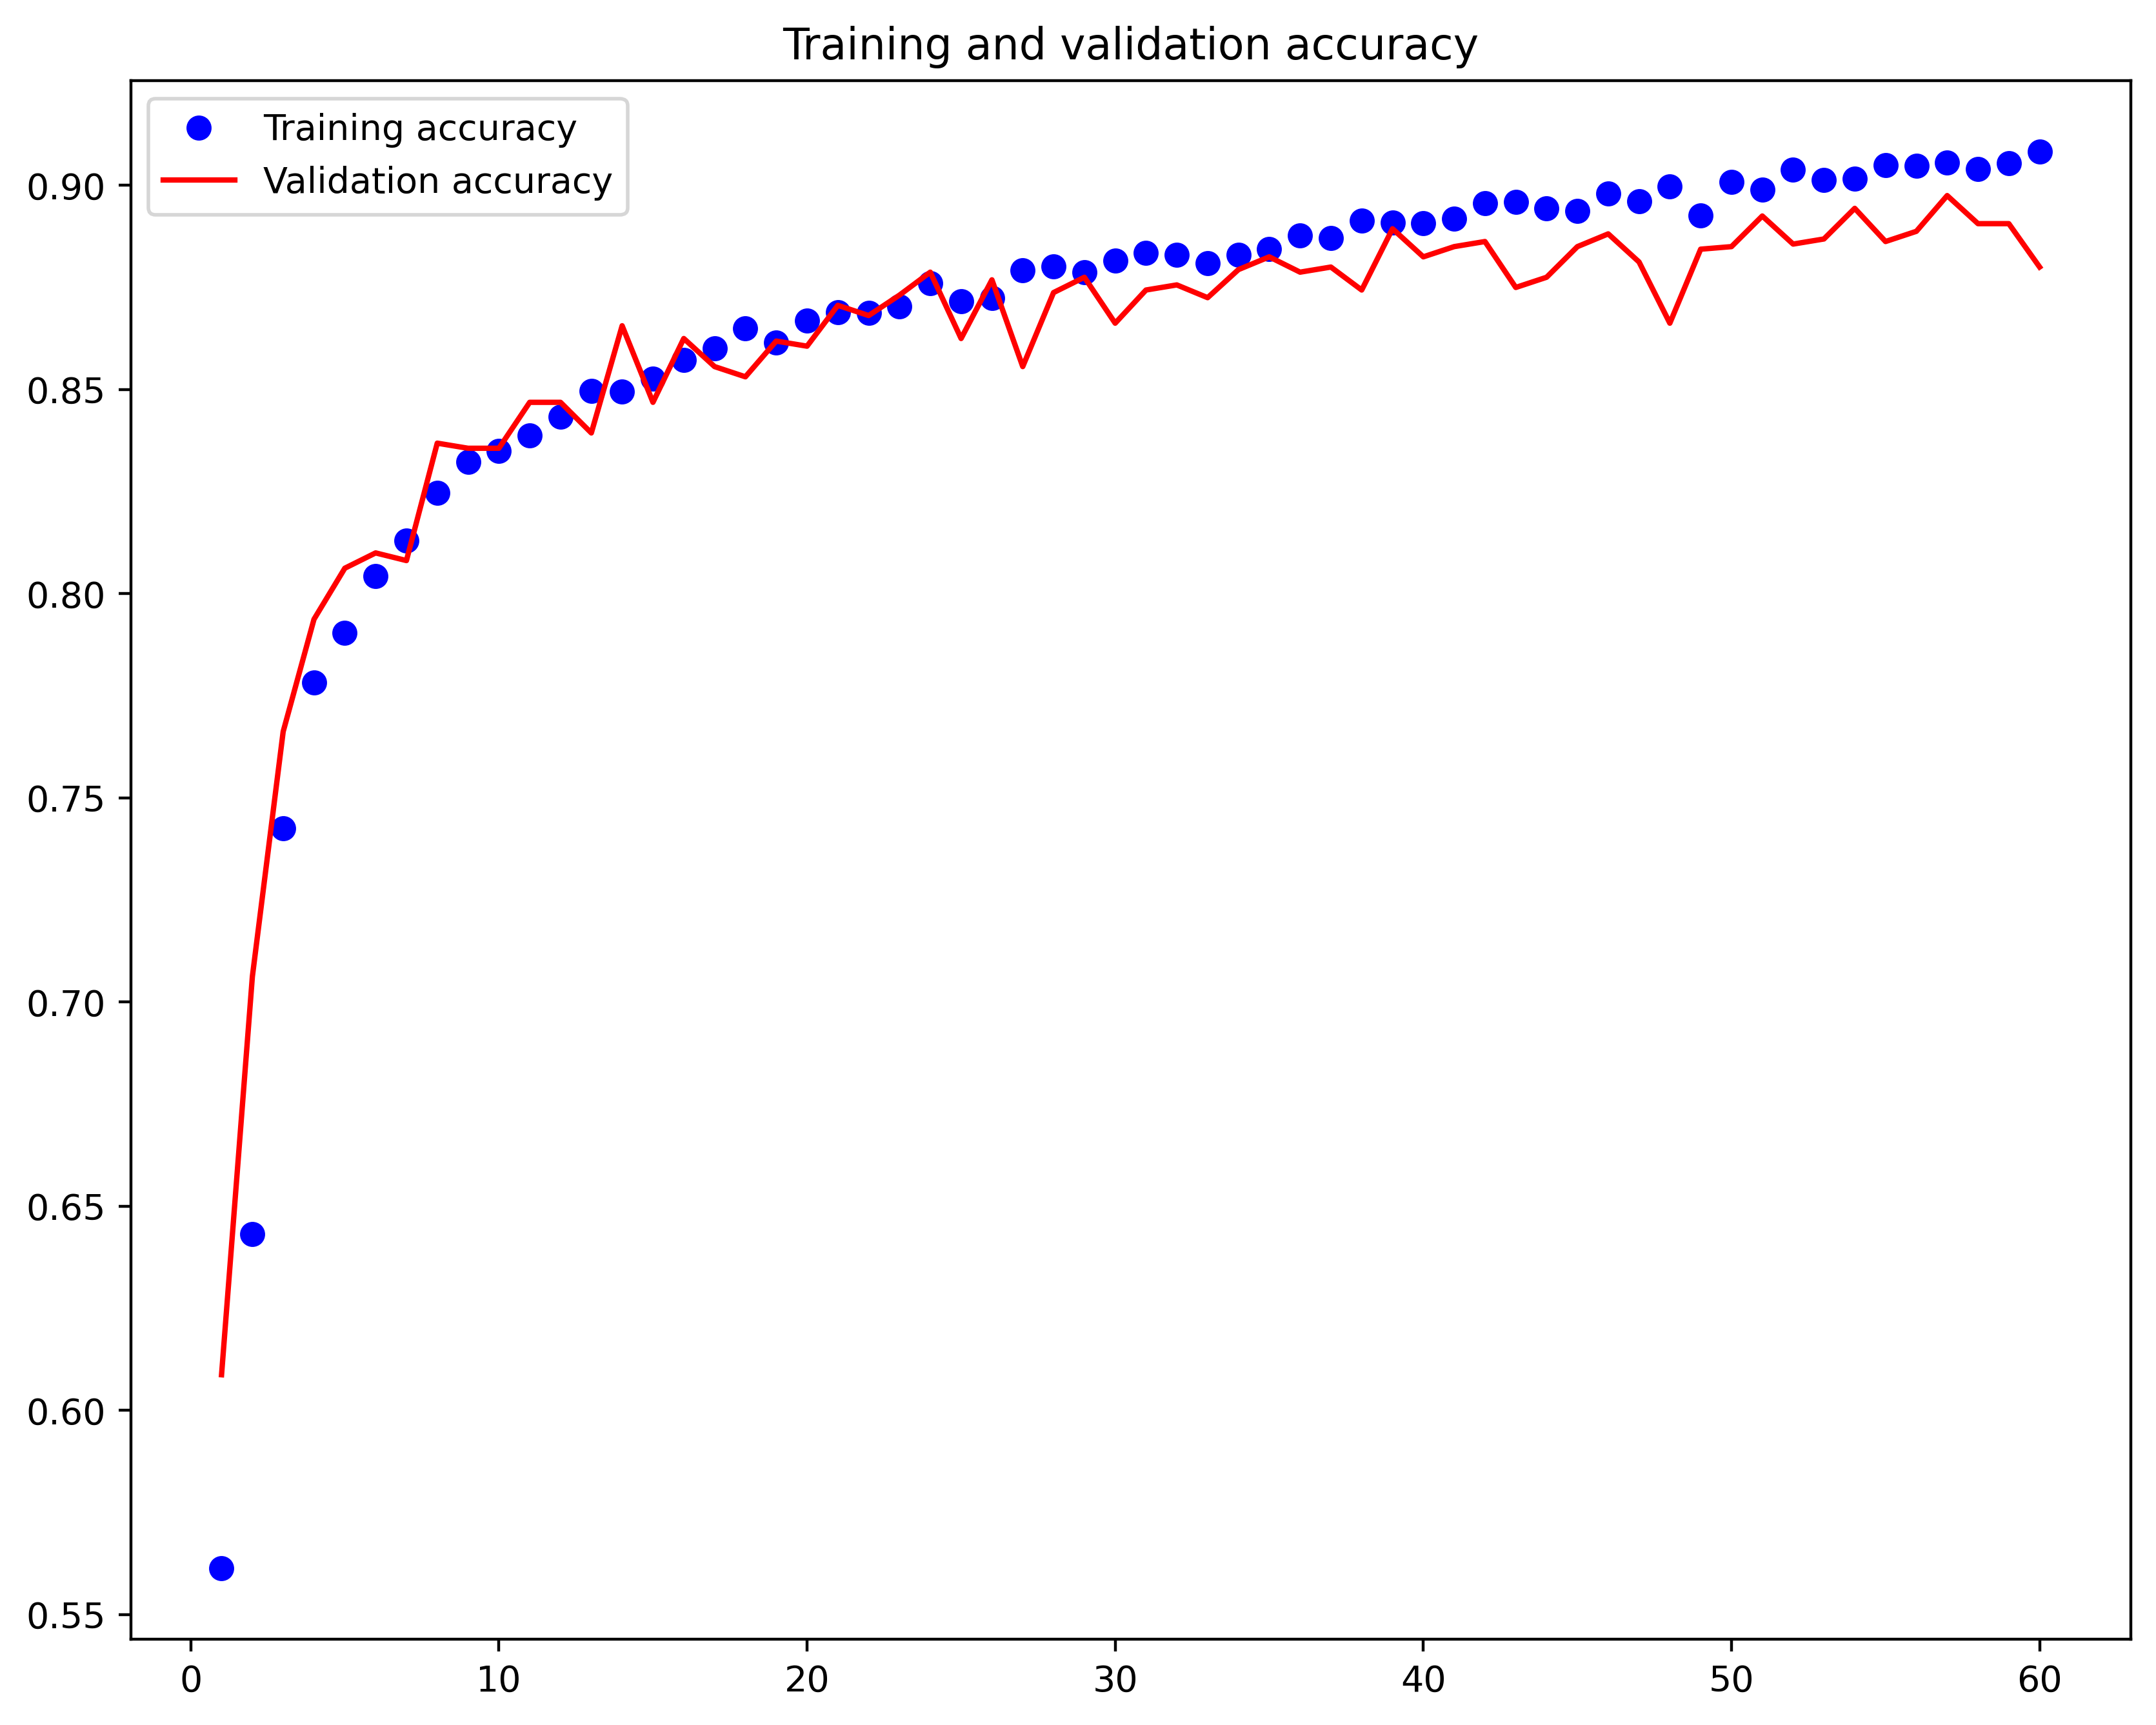

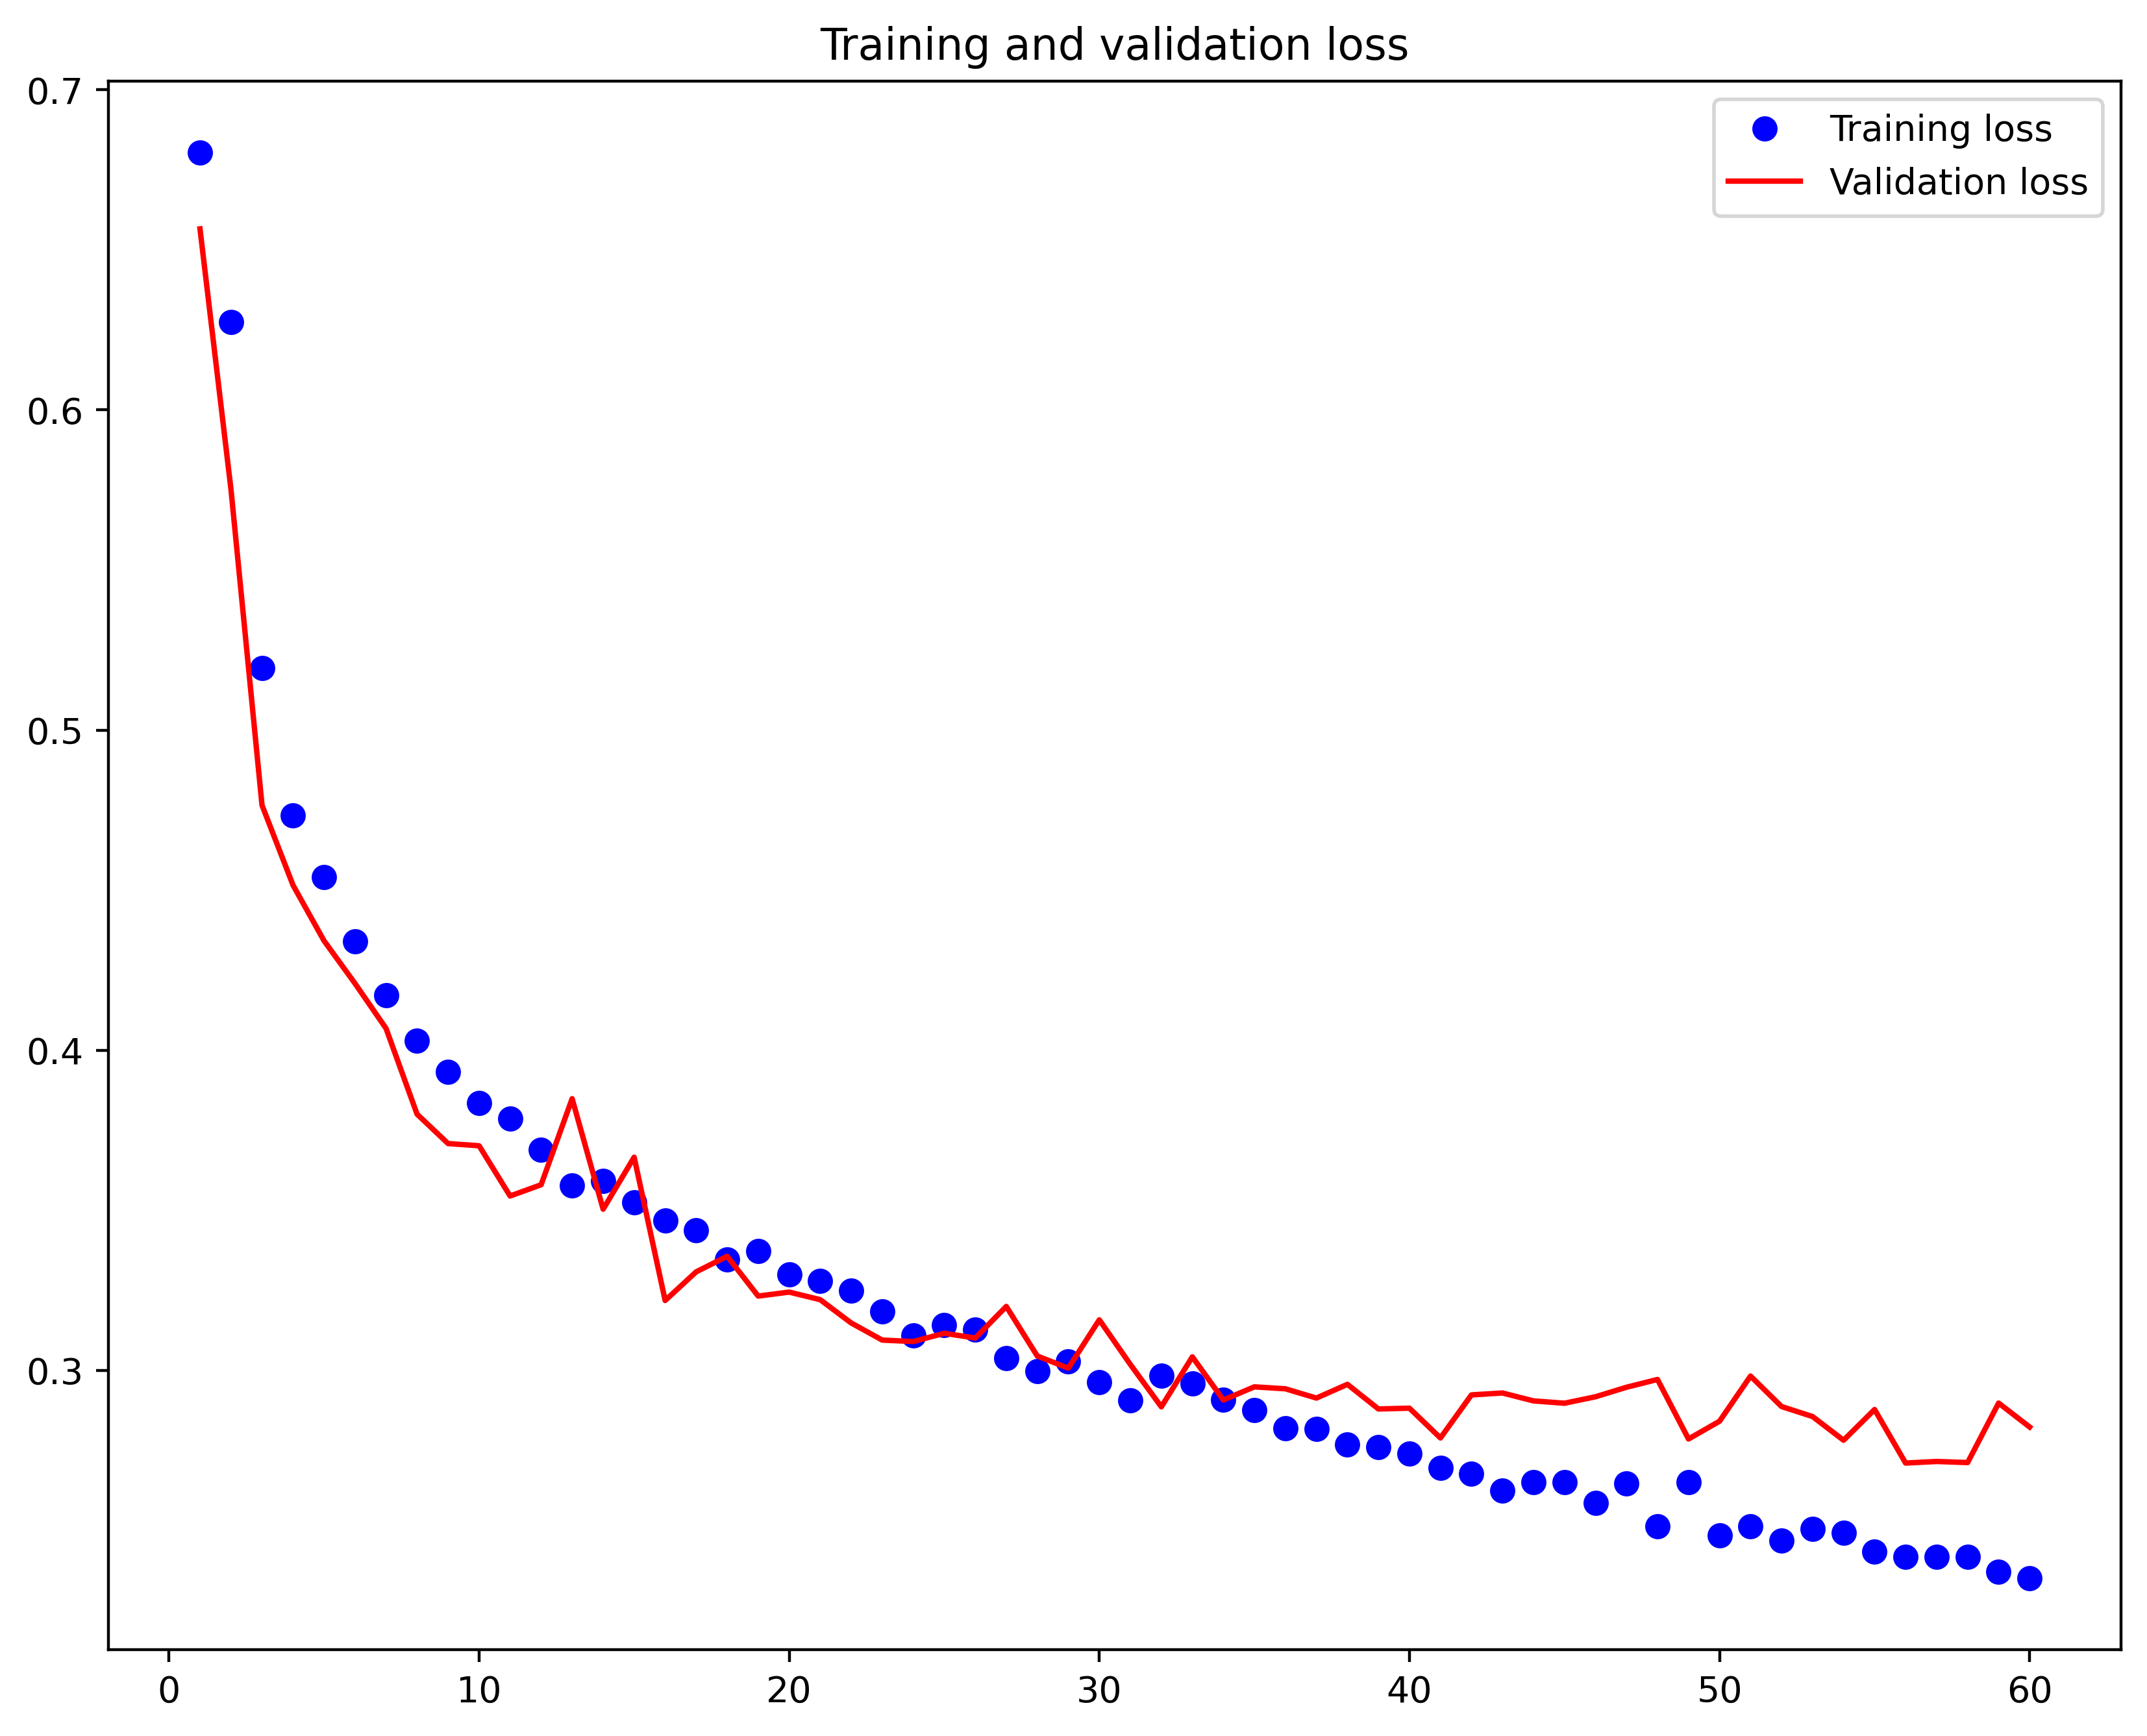

In [104]:
plt.figure(figsize=(10,8),dpi=400)
accuracy = history_4.history["accuracy"]
val_accuracy = history_4.history["val_accuracy"]
loss = history_4.history["loss"]
val_loss = history_4.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy") 
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy",color="red") 
plt.title("Training and validation accuracy")
plt.legend()
plt.figure(figsize=(10,8),dpi=400)
plt.plot(epochs, loss, "bo", label="Training loss") 
plt.plot(epochs, val_loss, "b", label="Validation loss",color="red") 
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [126]:
model_4.evaluate(test_generator_2)

63/63 [==============================] - 1s 8ms/step - loss: 0.2769 - accuracy: 0.8955


[0.2769455909729004, 0.8955000042915344]

In [139]:

test_steps_per_epoch = np.math.ceil(validation_generator_2.samples / validation_generator_2.batch_size)

predictions = model_4.predict_generator(validation_generator_2, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = validation_generator_2.classes
class_labels = list(validation_generator_2.class_indices.keys())   

confusion_matrix = confusion_matrix(validation_generator_2.classes, predicted_classes)
print(confusion_matrix)
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


[[490 537]
 [464 509]]
              precision    recall  f1-score   support

     Anomaly       0.51      0.48      0.49      1027
  No-Anomaly       0.49      0.52      0.50       973

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000



In [138]:
x = list(validation_generator_2.class_indices.keys())
num_of_test_samples = 2000

Y_pred = model_4.predict_generator(validation_generator_2, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print()
print('Confusion Matrix')
print(confusion_matrix(validation_generator_2.classes, y_pred))

print()
print('Classification Report')
target_names = x
print(classification_report(validation_generator_2.classes, y_pred, target_names = target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.



Confusion Matrix
[[496 531]
 [458 515]]

Classification Report
              precision    recall  f1-score   support

     Anomaly       0.52      0.48      0.50      1027
  No-Anomaly       0.49      0.53      0.51       973

    accuracy                           0.51      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.51      0.51      0.51      2000



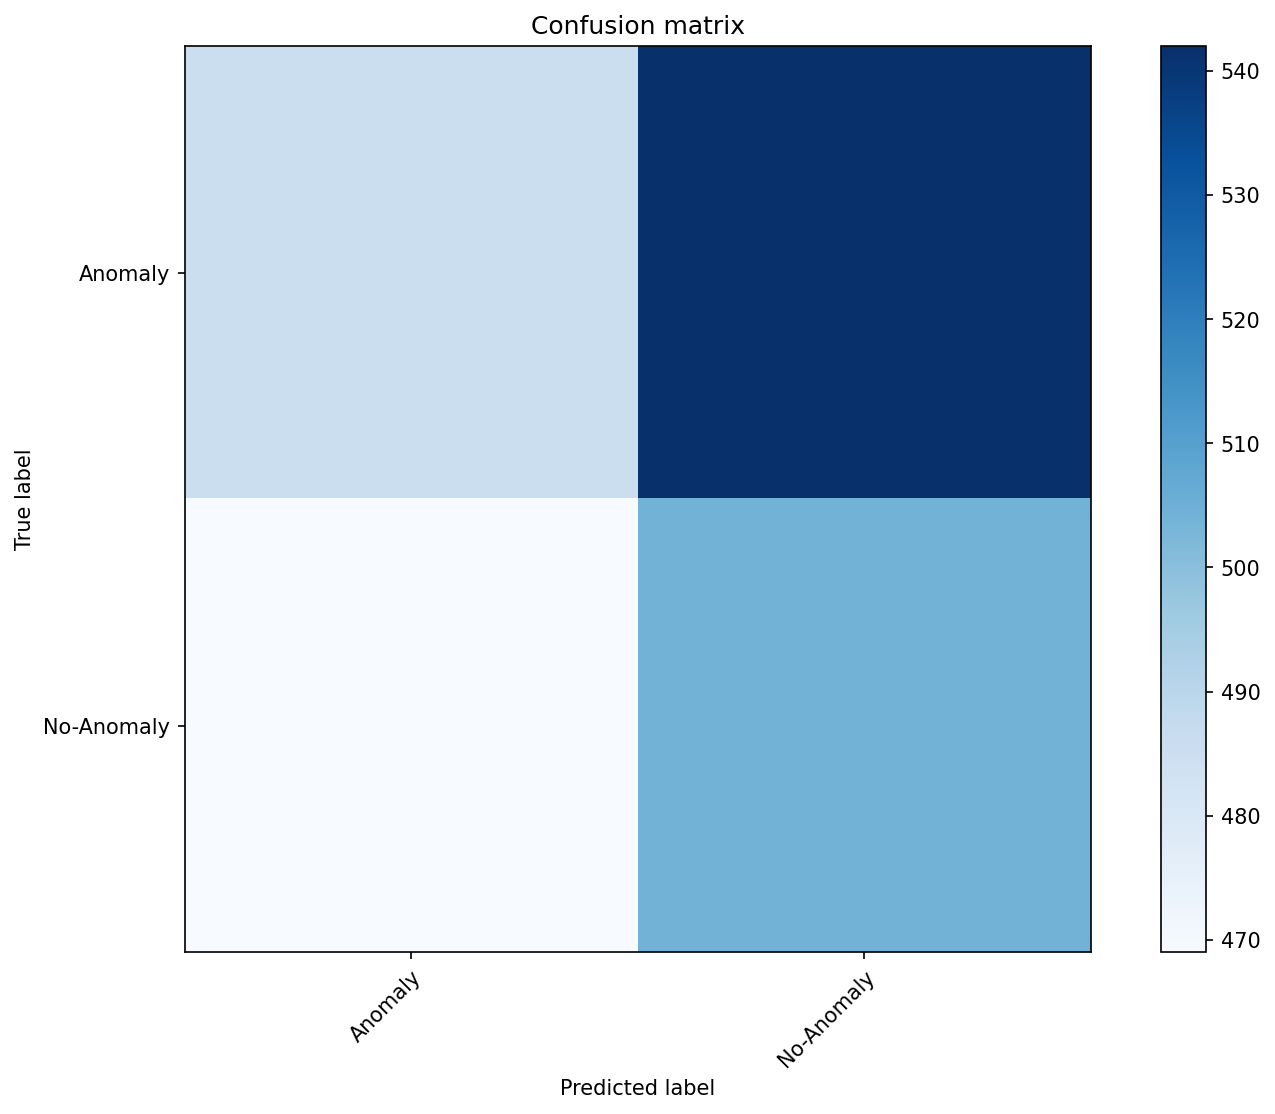

In [118]:
cm = confusion_matrix(validation_generator_2.classes, y_pred)
fig, ax = plt.subplots(figsize=(12,8),dpi=150)
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
title = 'Confusion matrix'
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=target_names, yticklabels=target_names,
    title=title,
    ylabel='True label',
    xlabel='Predicted label',
    )
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
#np.set_printoptions(precision=2)
plt.show()